In [177]:
import sys
sys.dont_write_bytecode = True
import time
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

# Parameters

In [178]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L1 = 0.5  # inductive energy
    E_C1 = 1.0  # charging energy
    E_J1 = 3  # Josephson energy
    phi_ext1 = np.pi  # external phase shift

    # Parameters of the second fluxonium.
    E_L2 = 0.6  # inductive energy
    E_C2 = 1.0  # charging energy
    E_J2 = 3.2  # Josephson energy
    phi_ext2 = np.pi  # external phase shift

    # Interaction energy between two fluxoniums.
    # E_int n_1 n_2 or E_int phi_1 phi_2.
    E_int = 0.27  # when a single value is needed
    E_int_range = np.linspace(0, 0.3, 11)  # when a range is needed
    coupling = 'charge'  # 'charge' or 'flux'

qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
print("Qubit A: %s" % (qubit1))
print("Qubit B: %s" % (qubit2))

Qubit A: A fluxonium qubit with E_L = 0.5 GHz, E_C = 1.0 GHz, and E_J = 3 GHz. The external phase shift is phi_ext/pi = 1.0.
Qubit B: A fluxonium qubit with E_L = 0.6 GHz, E_C = 1.0 GHz, and E_J = 3.2 GHz. The external phase shift is phi_ext/pi = 1.0.


# Uncoupled qubits
## Spectra, matrix elements

In [179]:
phi_pts = np.linspace(0, 1, 1001)*np.pi*2
energies1 = np.zeros((nlev_single, len(phi_pts)))
energies2 = np.zeros_like(energies1)
n1_01 = np.zeros_like(phi_pts, dtype = complex)
n2_01 = np.zeros_like(phi_pts, dtype = complex)
phi1_01 = np.zeros_like(phi_pts, dtype = complex)
phi2_01 = np.zeros_like(phi_pts, dtype = complex)

for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    energies1[:, iphi] = qubit1.levels(nlev=nlev_single)
    energies2[:, iphi] = qubit2.levels(nlev=nlev_single)
    n1_01[iphi] = qubit1.n_ij(level1=0,level2=1)
    n2_01[iphi] = qubit2.n_ij(level1=0,level2=1)
    phi1_01[iphi] = qubit1.phi_ij(level1=0,level2=1)
    phi2_01[iphi] = qubit2.phi_ij(level1=0,level2=1)

Text(0, 0.5, 'Frequency (GHz)')

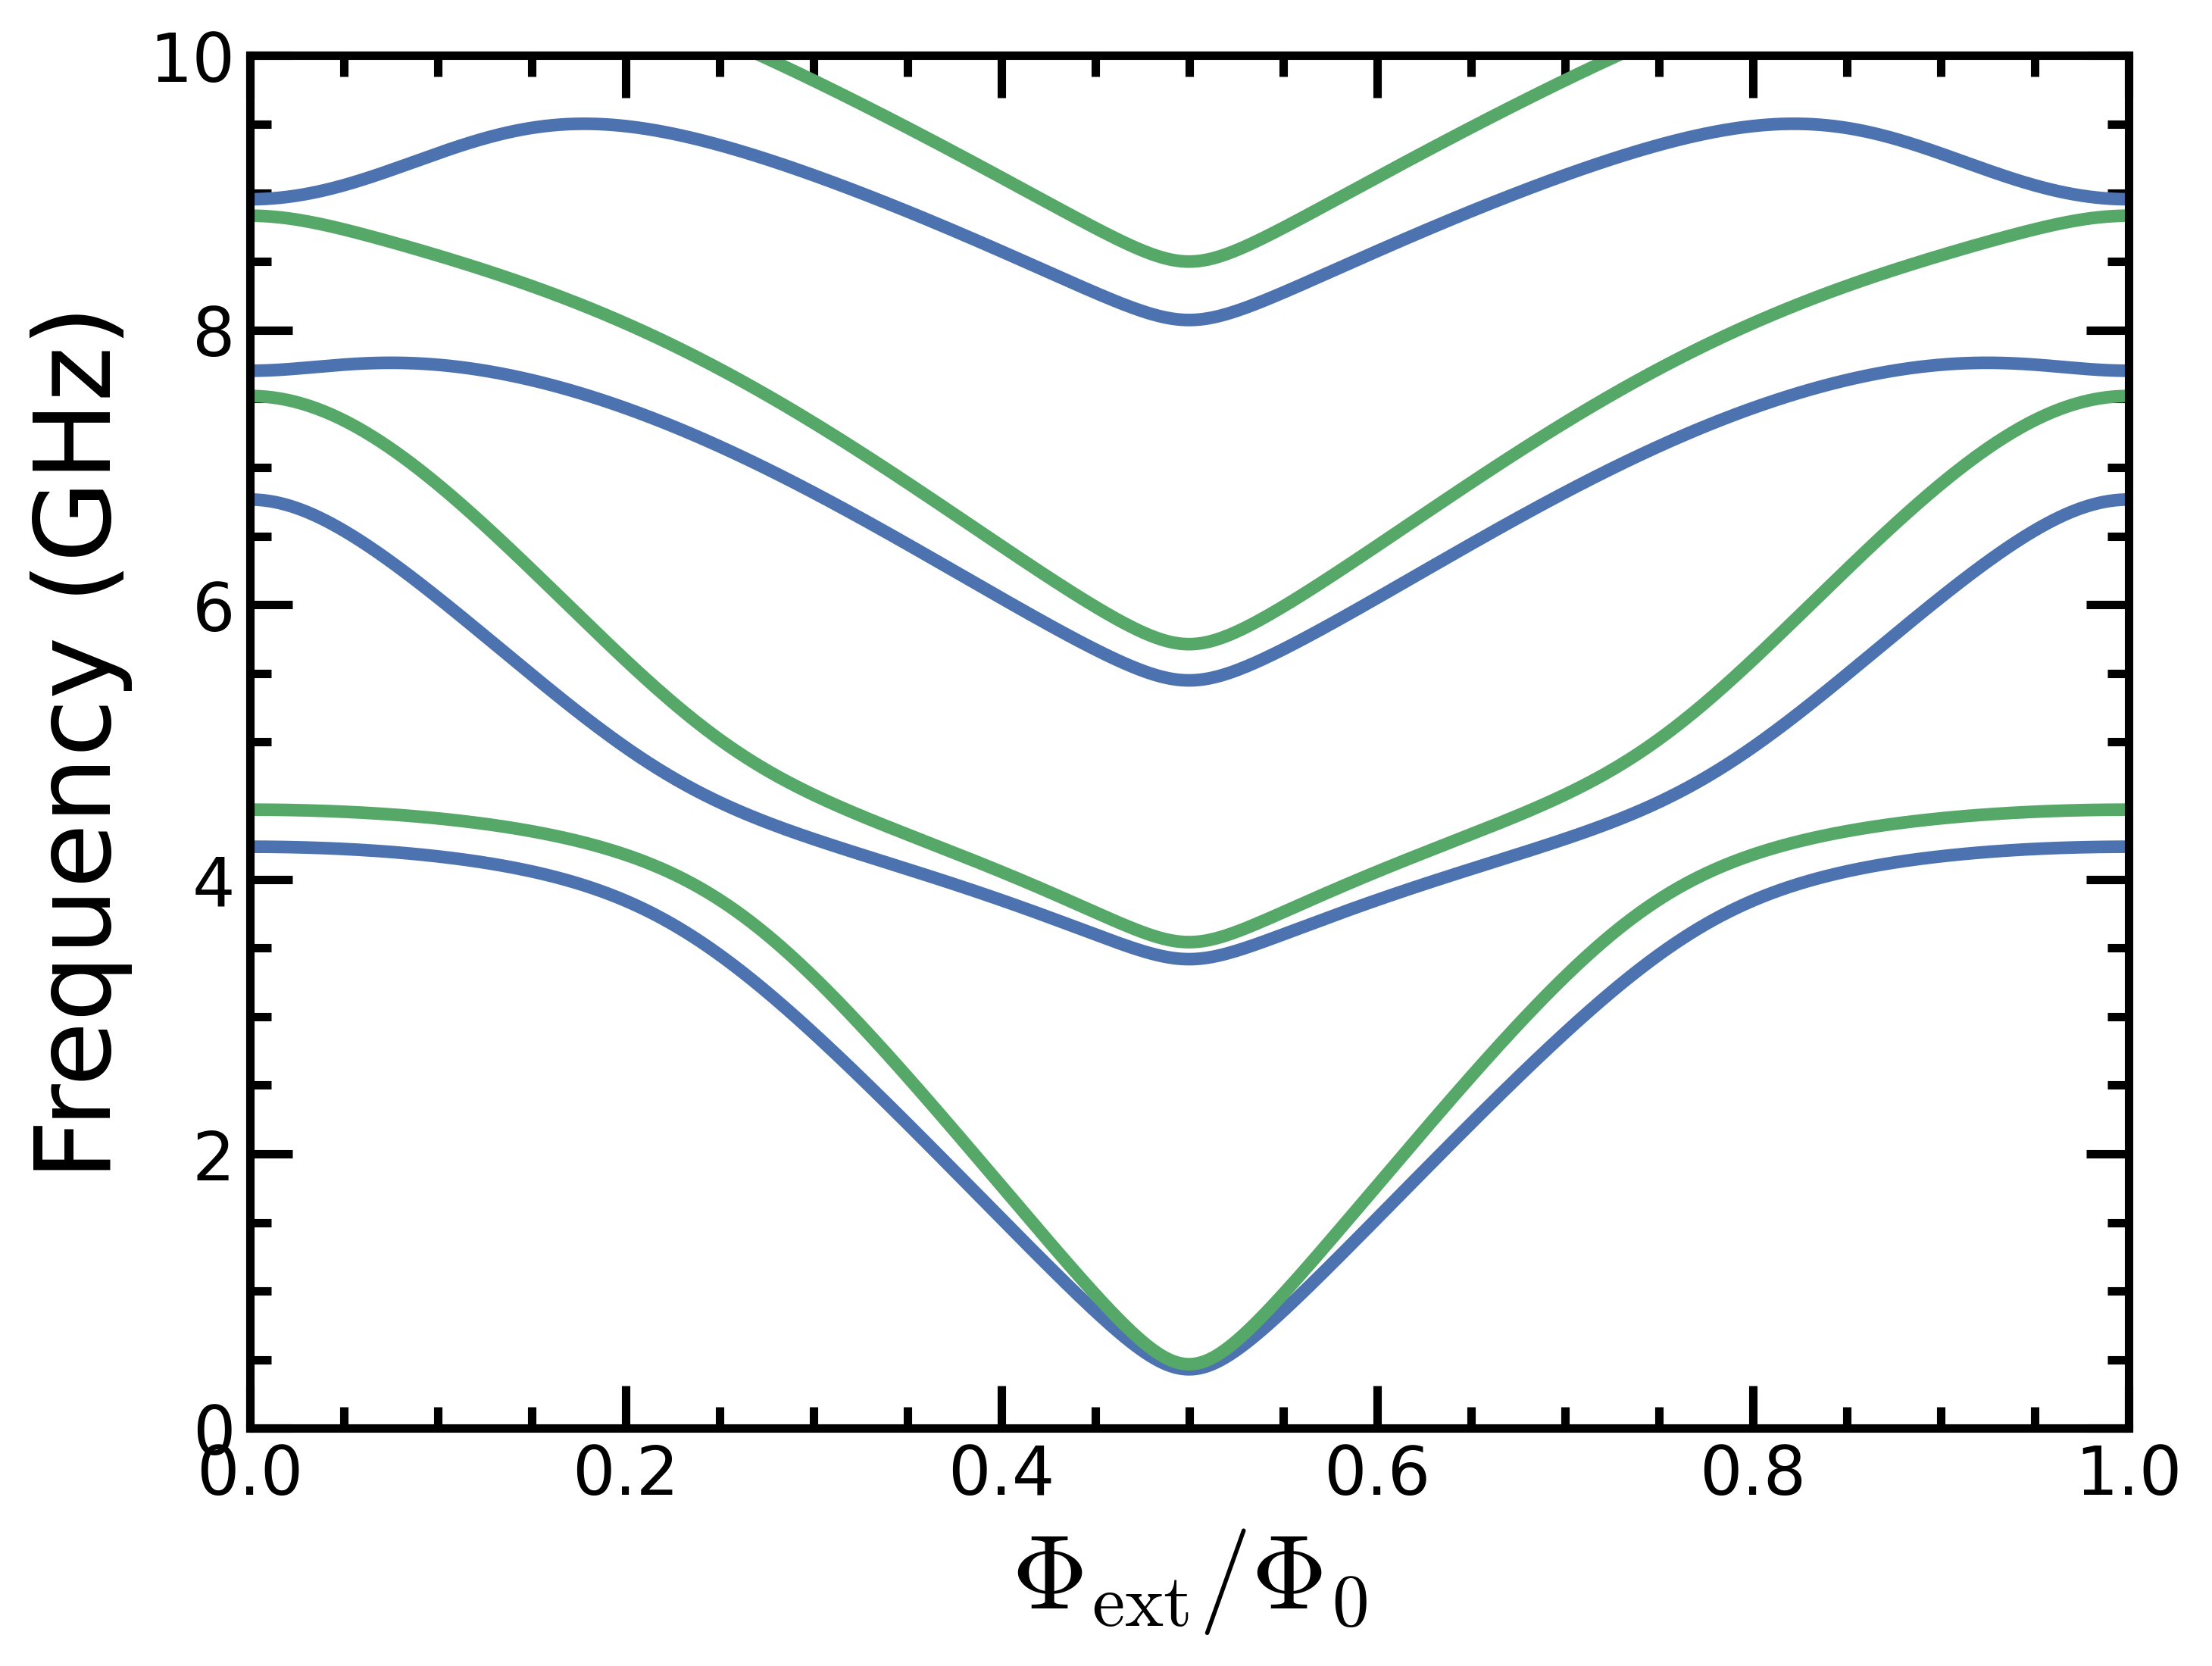

In [180]:
plt.figure(figsize = [8,6])
for idx in range(1,7):
    plt.plot(phi_pts/(np.pi*2), energies1[idx, :] - energies1[0, :], color='C0')
    plt.plot(phi_pts/(np.pi*2), energies2[idx, :] - energies2[0, :], color='C1')
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

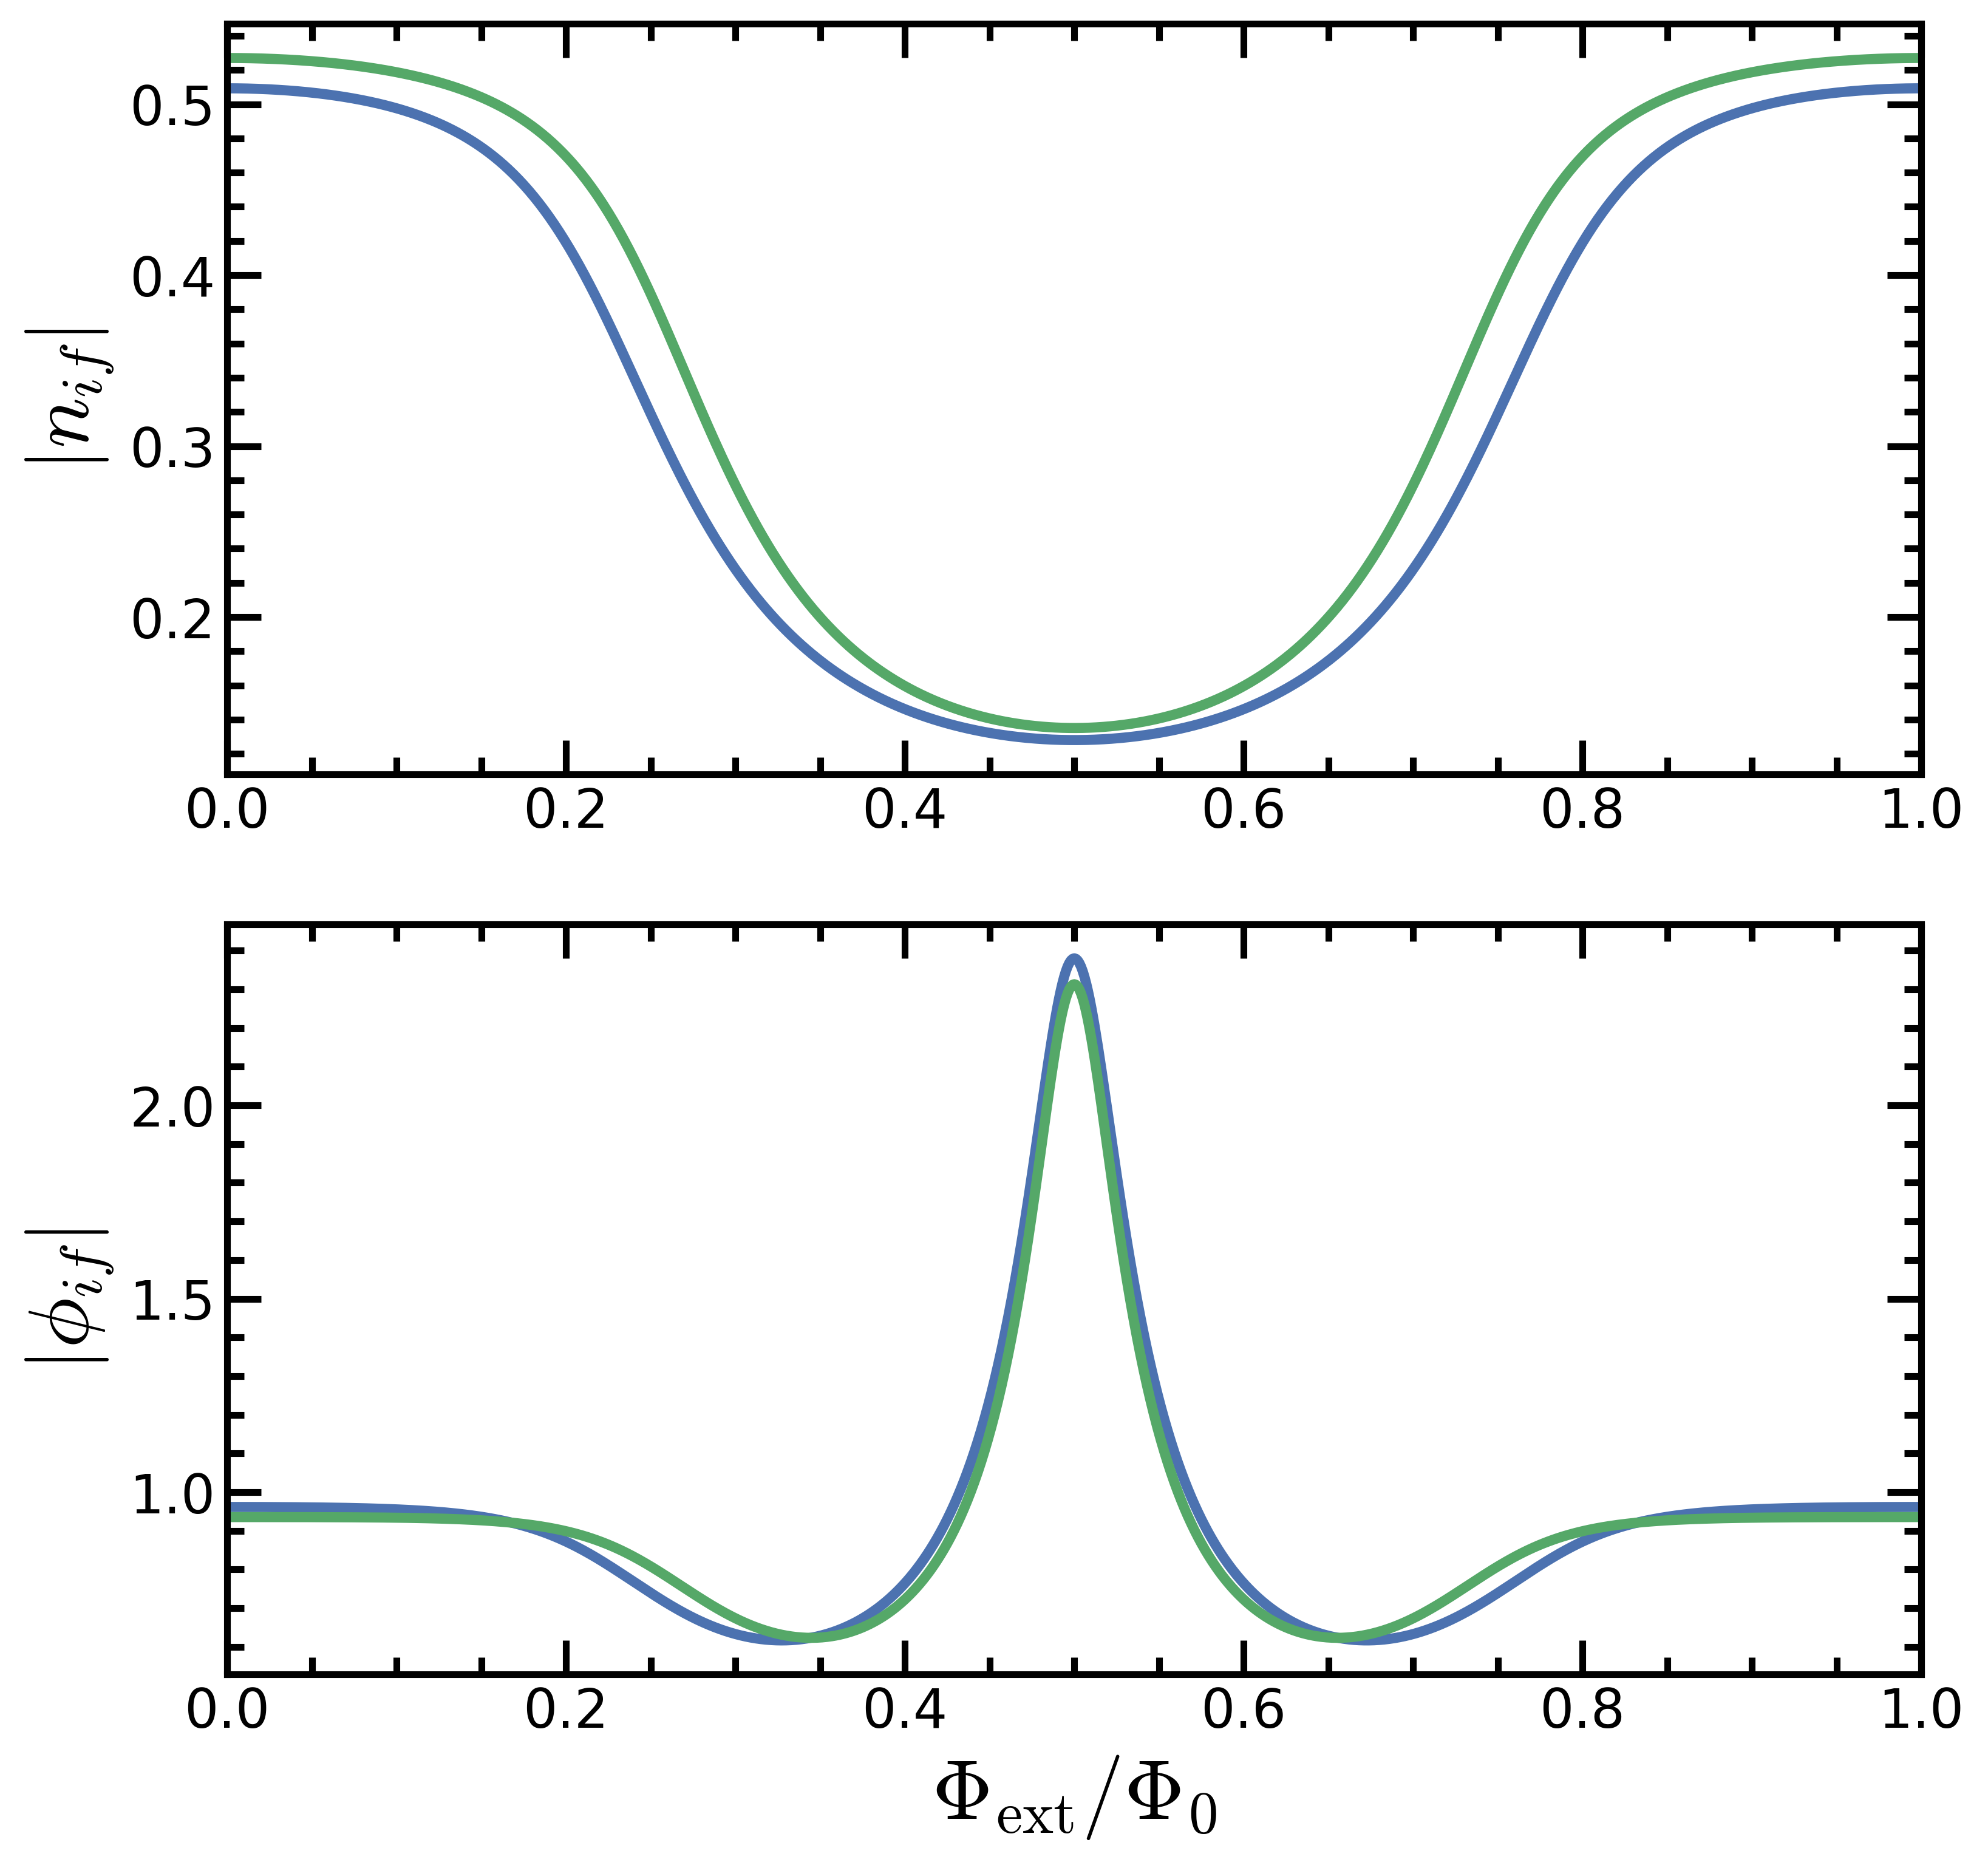

In [181]:
fig, (ax1, ax2) = plt.subplots(2, figsize=[9,9])
ax1.set_xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
ax2.set_xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
ax2.set_xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
ax1.set_ylabel(r'$|n_{if}|$')
ax2.set_ylabel(r'$|\phi_{if}|$')
ax1.plot(phi_pts/(np.pi*2), abs(n1_01))
ax1.plot(phi_pts/(np.pi*2), abs(n2_01))
ax2.plot(phi_pts/(np.pi*2), abs(phi1_01))
ax2.plot(phi_pts/(np.pi*2), abs(phi2_01))

# Interacting systems
## Charge coupling
### Sweep flux

In [182]:
#Sweep flux with fixed coupling
coupling_type = 'charge'
E_int = 0.2 #GHz
nlev_show = 15  # The number of two-qubit levels to show.
energies_coupled_sflux = np.zeros((len(phi_pts),nlev_show))
for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_sflux[iphi, :] = system.levels()[:nlev_show]

Text(0, 0.5, 'Frequency (GHz)')

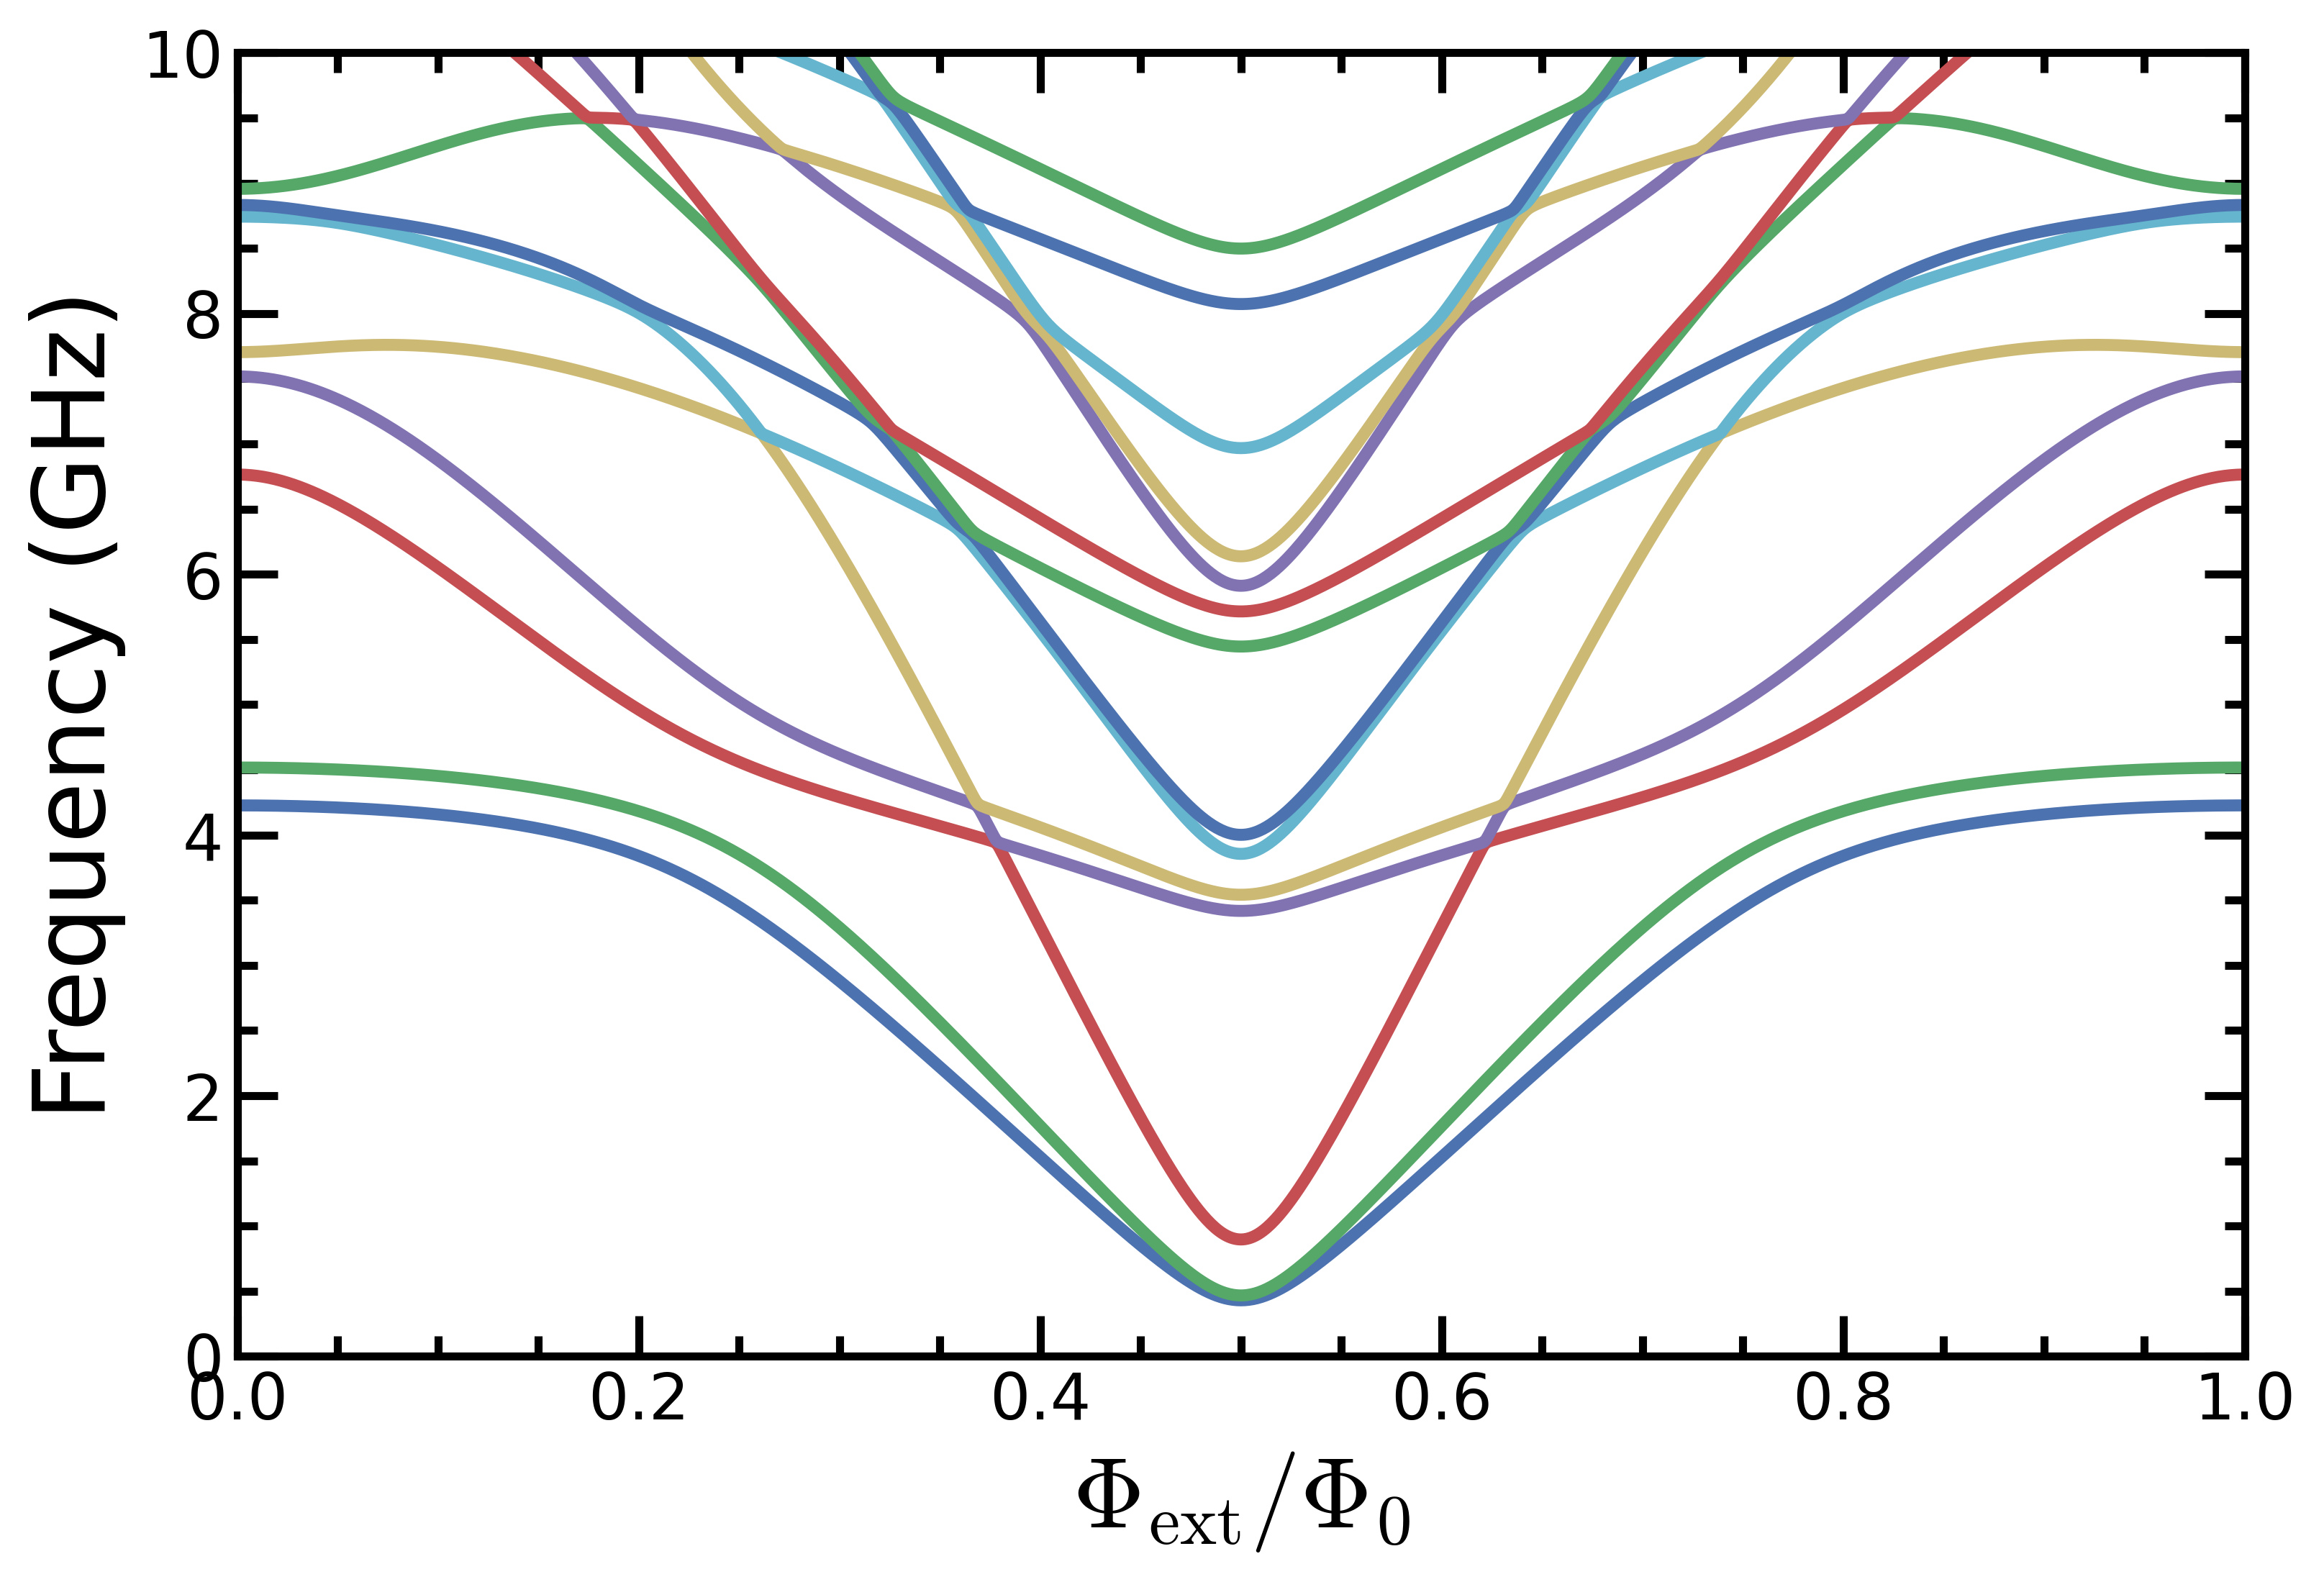

In [183]:
plt.figure(figsize = [9,6])
for idx in range(1, nlev_show):
    plt.plot(phi_pts/(np.pi*2), energies_coupled_sflux[:,idx] - energies_coupled_sflux[:,0])
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

### Sweep coupling

In [210]:
#Sweep the coupling strength, charge
E_int_array = np.linspace(0, 0.5, 501)
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
print (qubit1.n_ij(level1=0,level2=1))
print (qubit2.n_ij(level1=0,level2=1))
print (qubit1.phi_ij(level1=0,level2=1))
print (qubit2.phi_ij(level1=0,level2=1))
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(E_int_array)))

for idx, E_int in enumerate(E_int_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_swE[:,idx] = system.levels()

-0.12800848922763347j
-0.09941209453216122j
(2.379994464667067+0j)
(2.339686297374444+0j)


(0.0, 0.5)

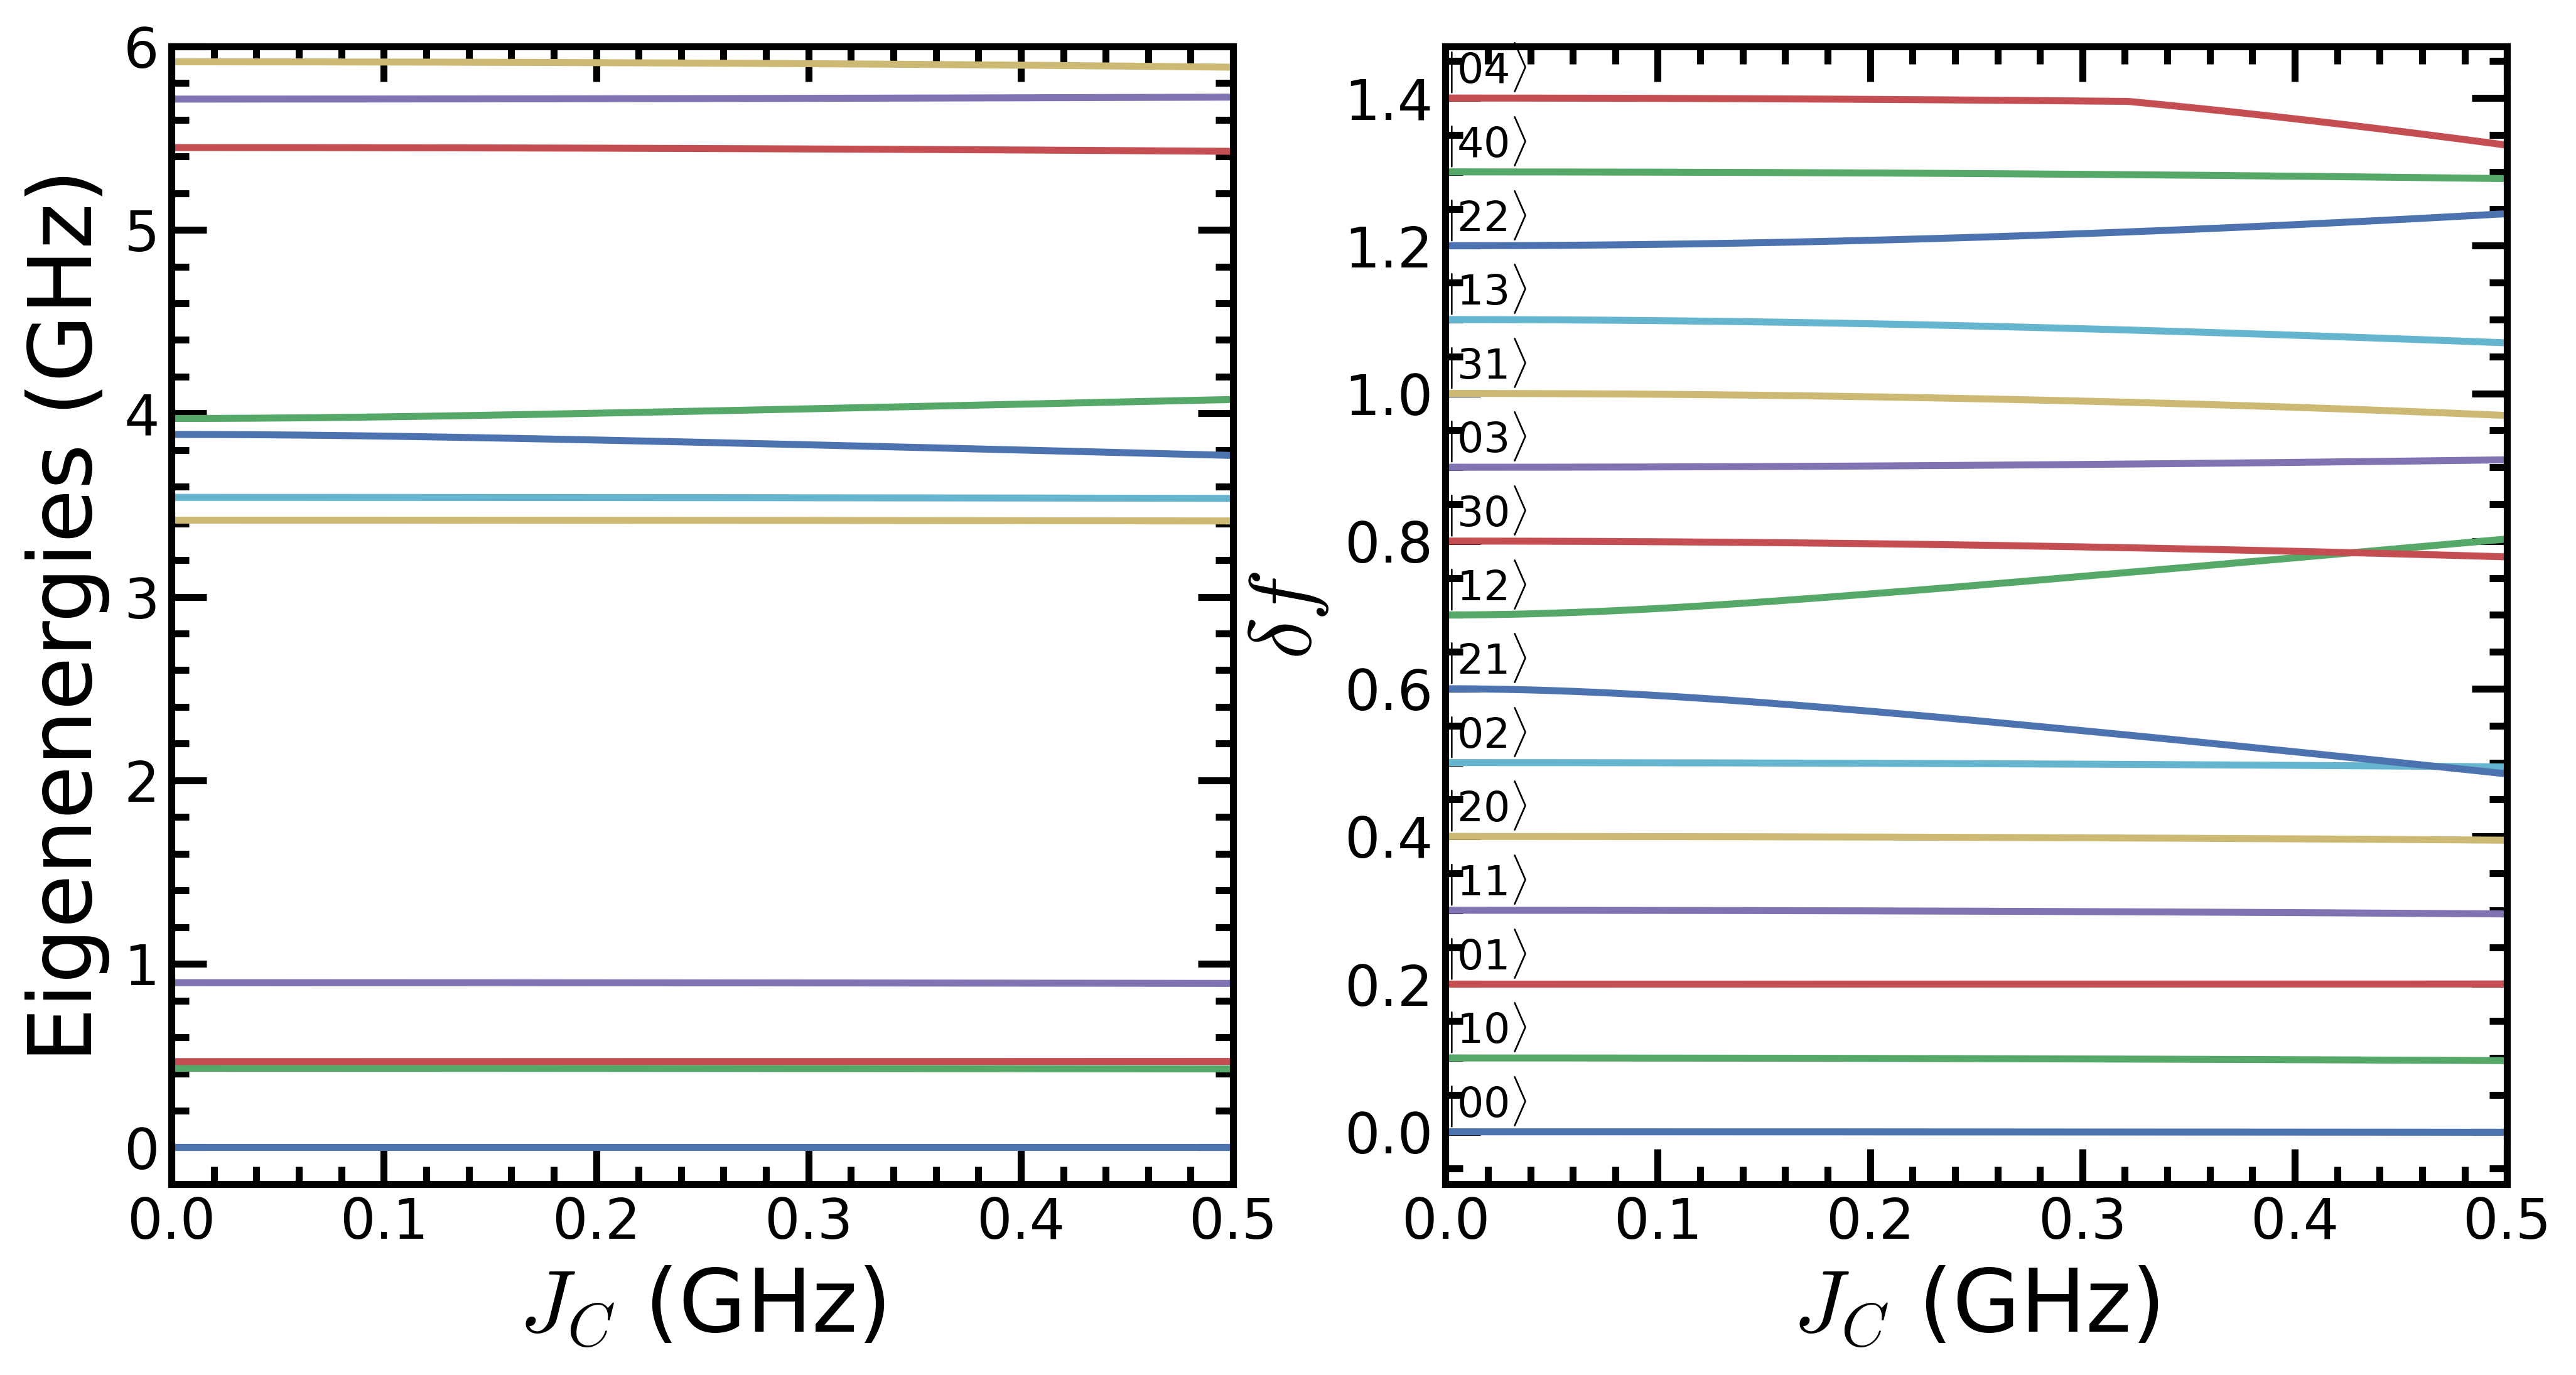

In [185]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,6])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

#Transition freqs
for idx in range(0, nlev_show):
    ax1.plot(E_int_array, energies_coupled_swE[idx, :]-energies_coupled_swE[0, :], linewidth = 2.0)
ax1.set_xlabel('$J_C$ (GHz)')
ax1.set_ylabel('Eigenenergies (GHz)')
ax1.set_xlim([E_int_array[0], E_int_array[-1]])
ax1.set_ylim([-0.2,6])

#State labeling
for idx in range(0, nlev_show):
    ax2.plot(E_int_array, 0.1 * idx+(energies_coupled_swE[idx, :]-energies_coupled_swE[idx, 0]), linewidth = 2.0)
    label = (r'$|$' + system.level_label(idx, label_format='str') + r'$\rangle$')
    ax2.text(0, 0.02 + 0.1 * idx, label, fontsize=12)
ax2.set_xlabel('$J_C$ (GHz)')
ax2.set_ylabel(r'$\delta f$')
ax2.set_xlim([E_int_array[0], E_int_array[-1]])

(0.0, 500.0)

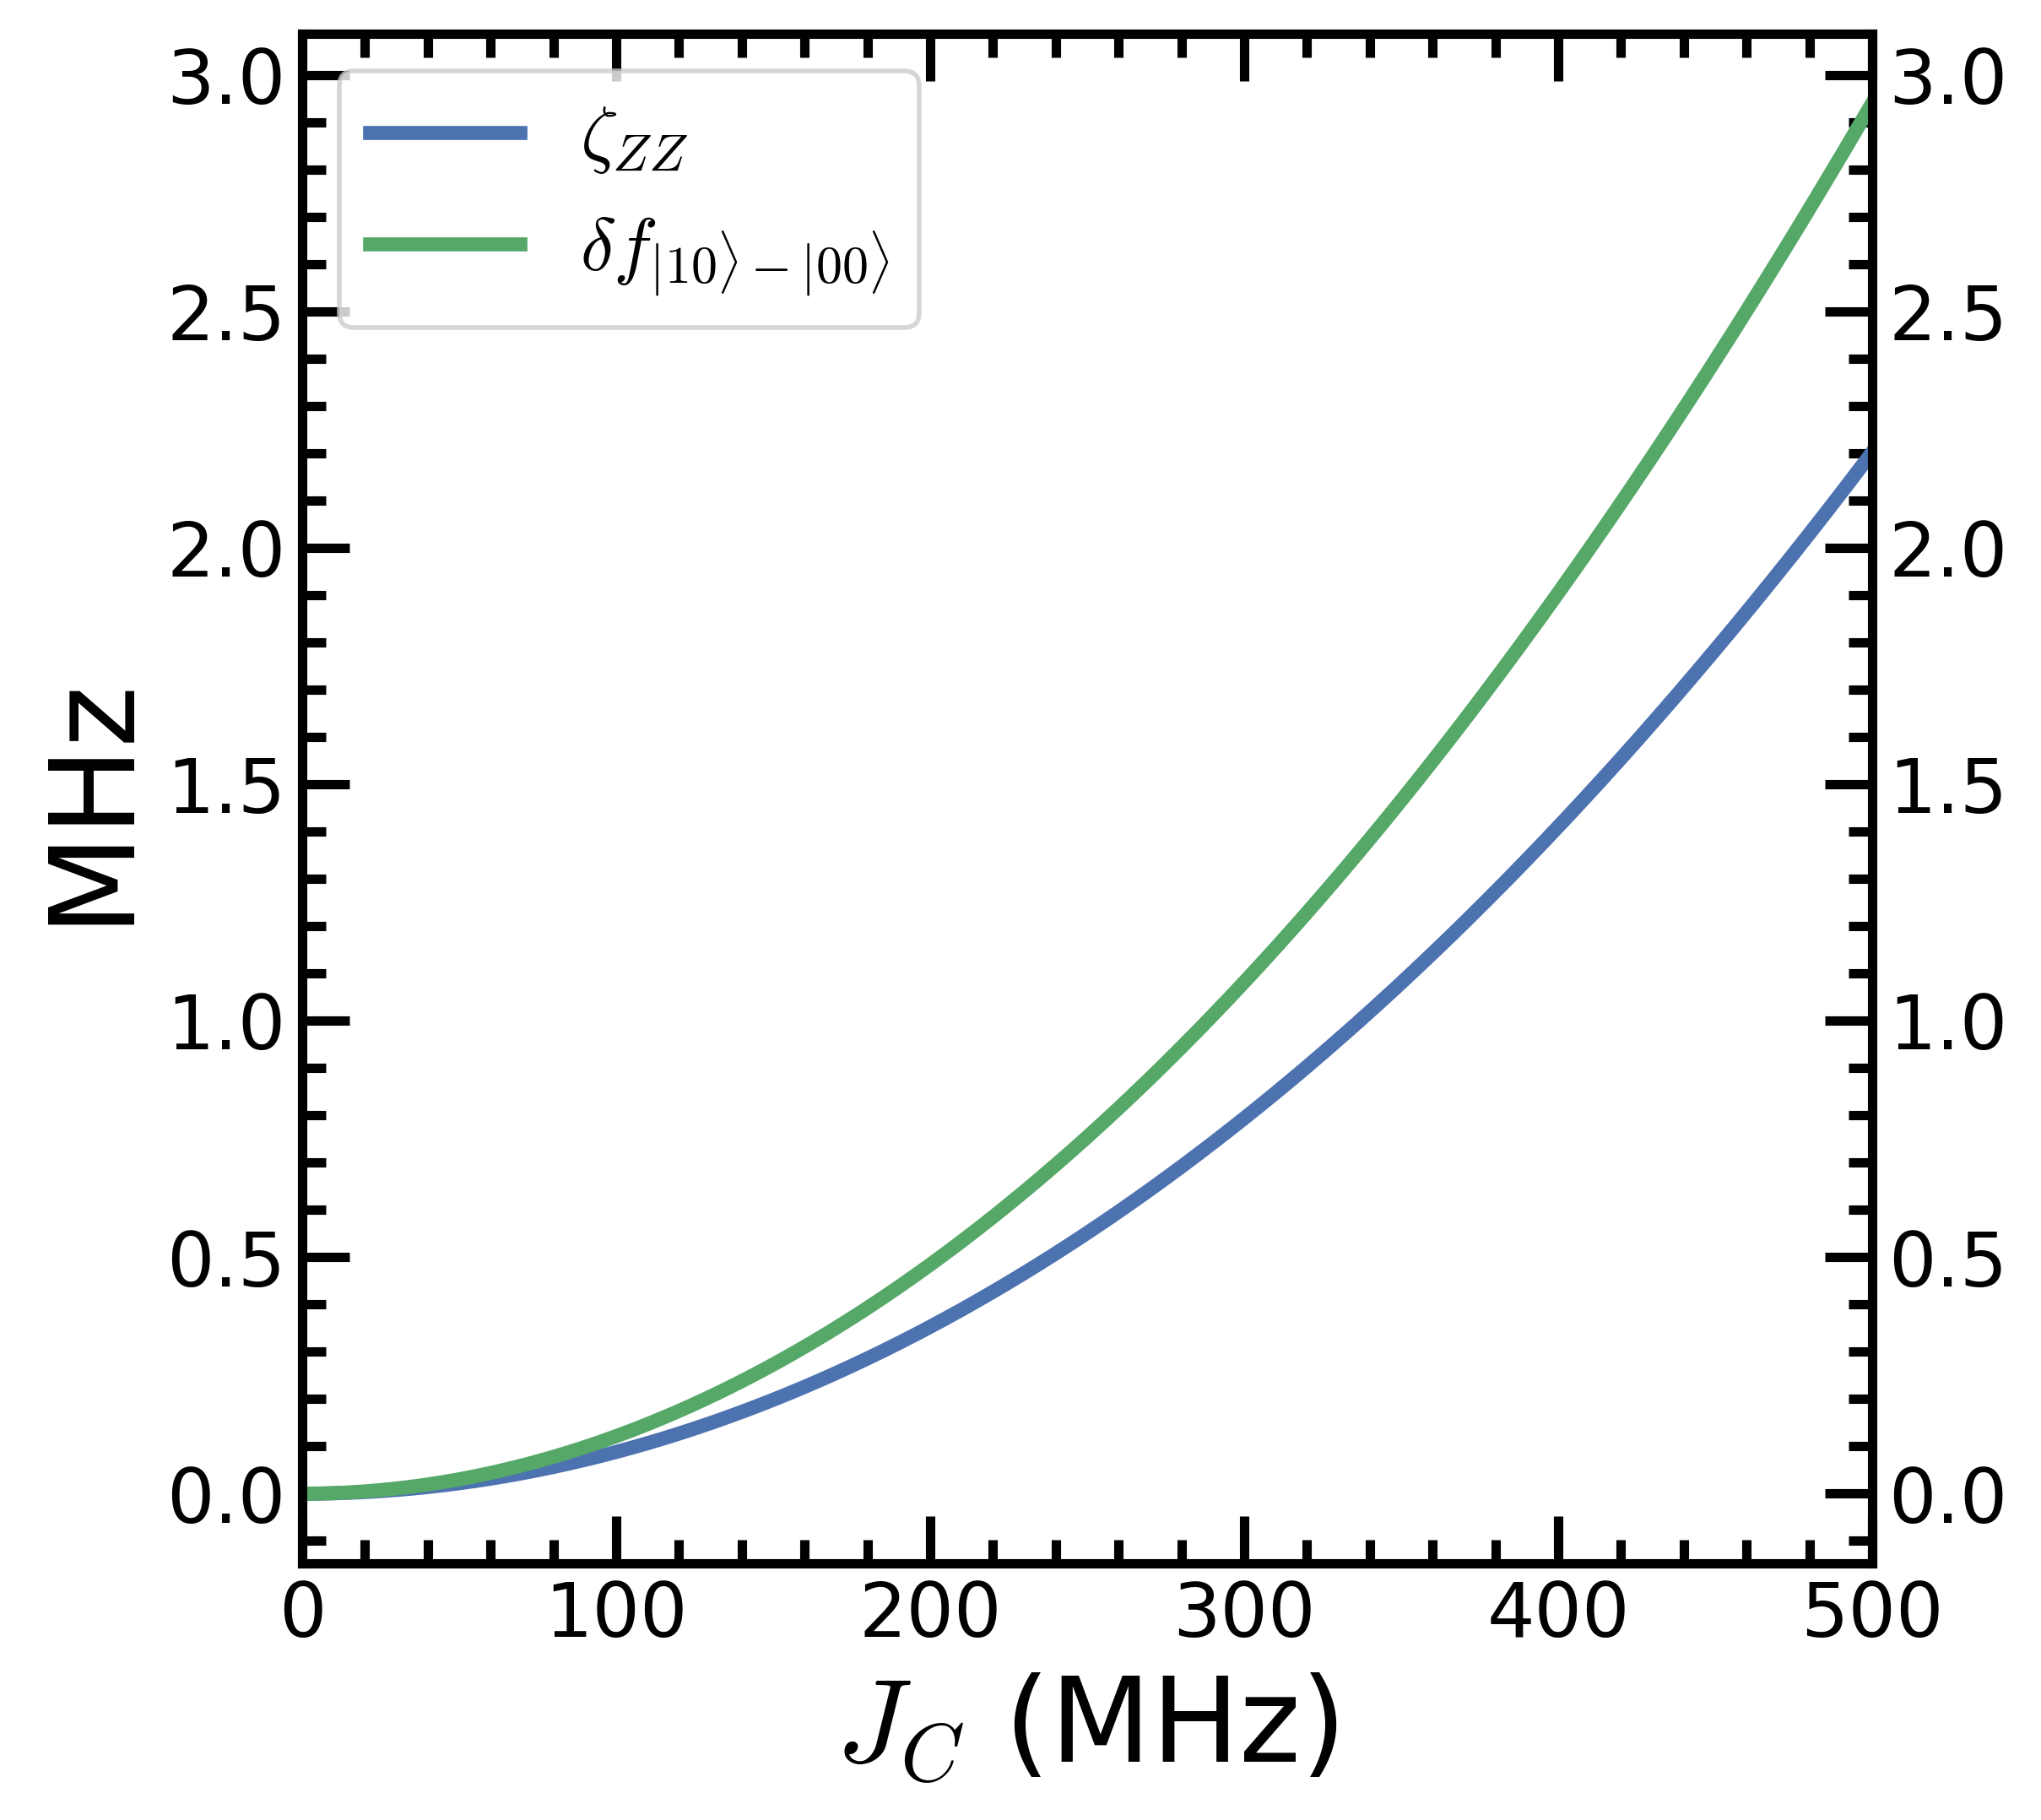

In [186]:
#Calculate ZZ rate:
plt.figure(figsize = [6,6])
zeta_ZZ = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift = energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :]
freq_shift = freq_shift - (energies_coupled_swE[system.level_label('10'), 0] - energies_coupled_swE[system.level_label('00'), 0])
plt.plot(E_int_array*1e3, abs(zeta_ZZ)*1e3, label = r'$\zeta_{ZZ}$')
plt.plot(E_int_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |00\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$J_C$ (MHz)')
plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])

### Sweep parameters, observe change in ZZ rate

In [196]:
#Sweep EJ and EL
coupling_type = 'charge'
E_int = 0.25
qubit1.phi_ext = np.pi
qubit2.phi_ext = np.pi
EJ_array = np.linspace(2,5,151)
EL_array = np.linspace(0.1,1,91)
ZZ_rate_charge = np.zeros((len(EJ_array), len(EL_array)))
for EJ_idx, E_J2 in enumerate(EJ_array):
    for EL_idx, E_L2 in enumerate(EL_array): 
        qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
        qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
        system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
        energies_ZZ_charge = system.levels()
        ZZ_rate[EJ_idx, EL_idx] = energies_ZZ_charge[system.level_label('11')] - energies_ZZ_charge[system.level_label('01')] \
- (energies_ZZ_charge[system.level_label('10')] - energies_ZZ_charge[system.level_label('00')])

Text(0, 0.5, '$E_{L2}$ (GHz)')

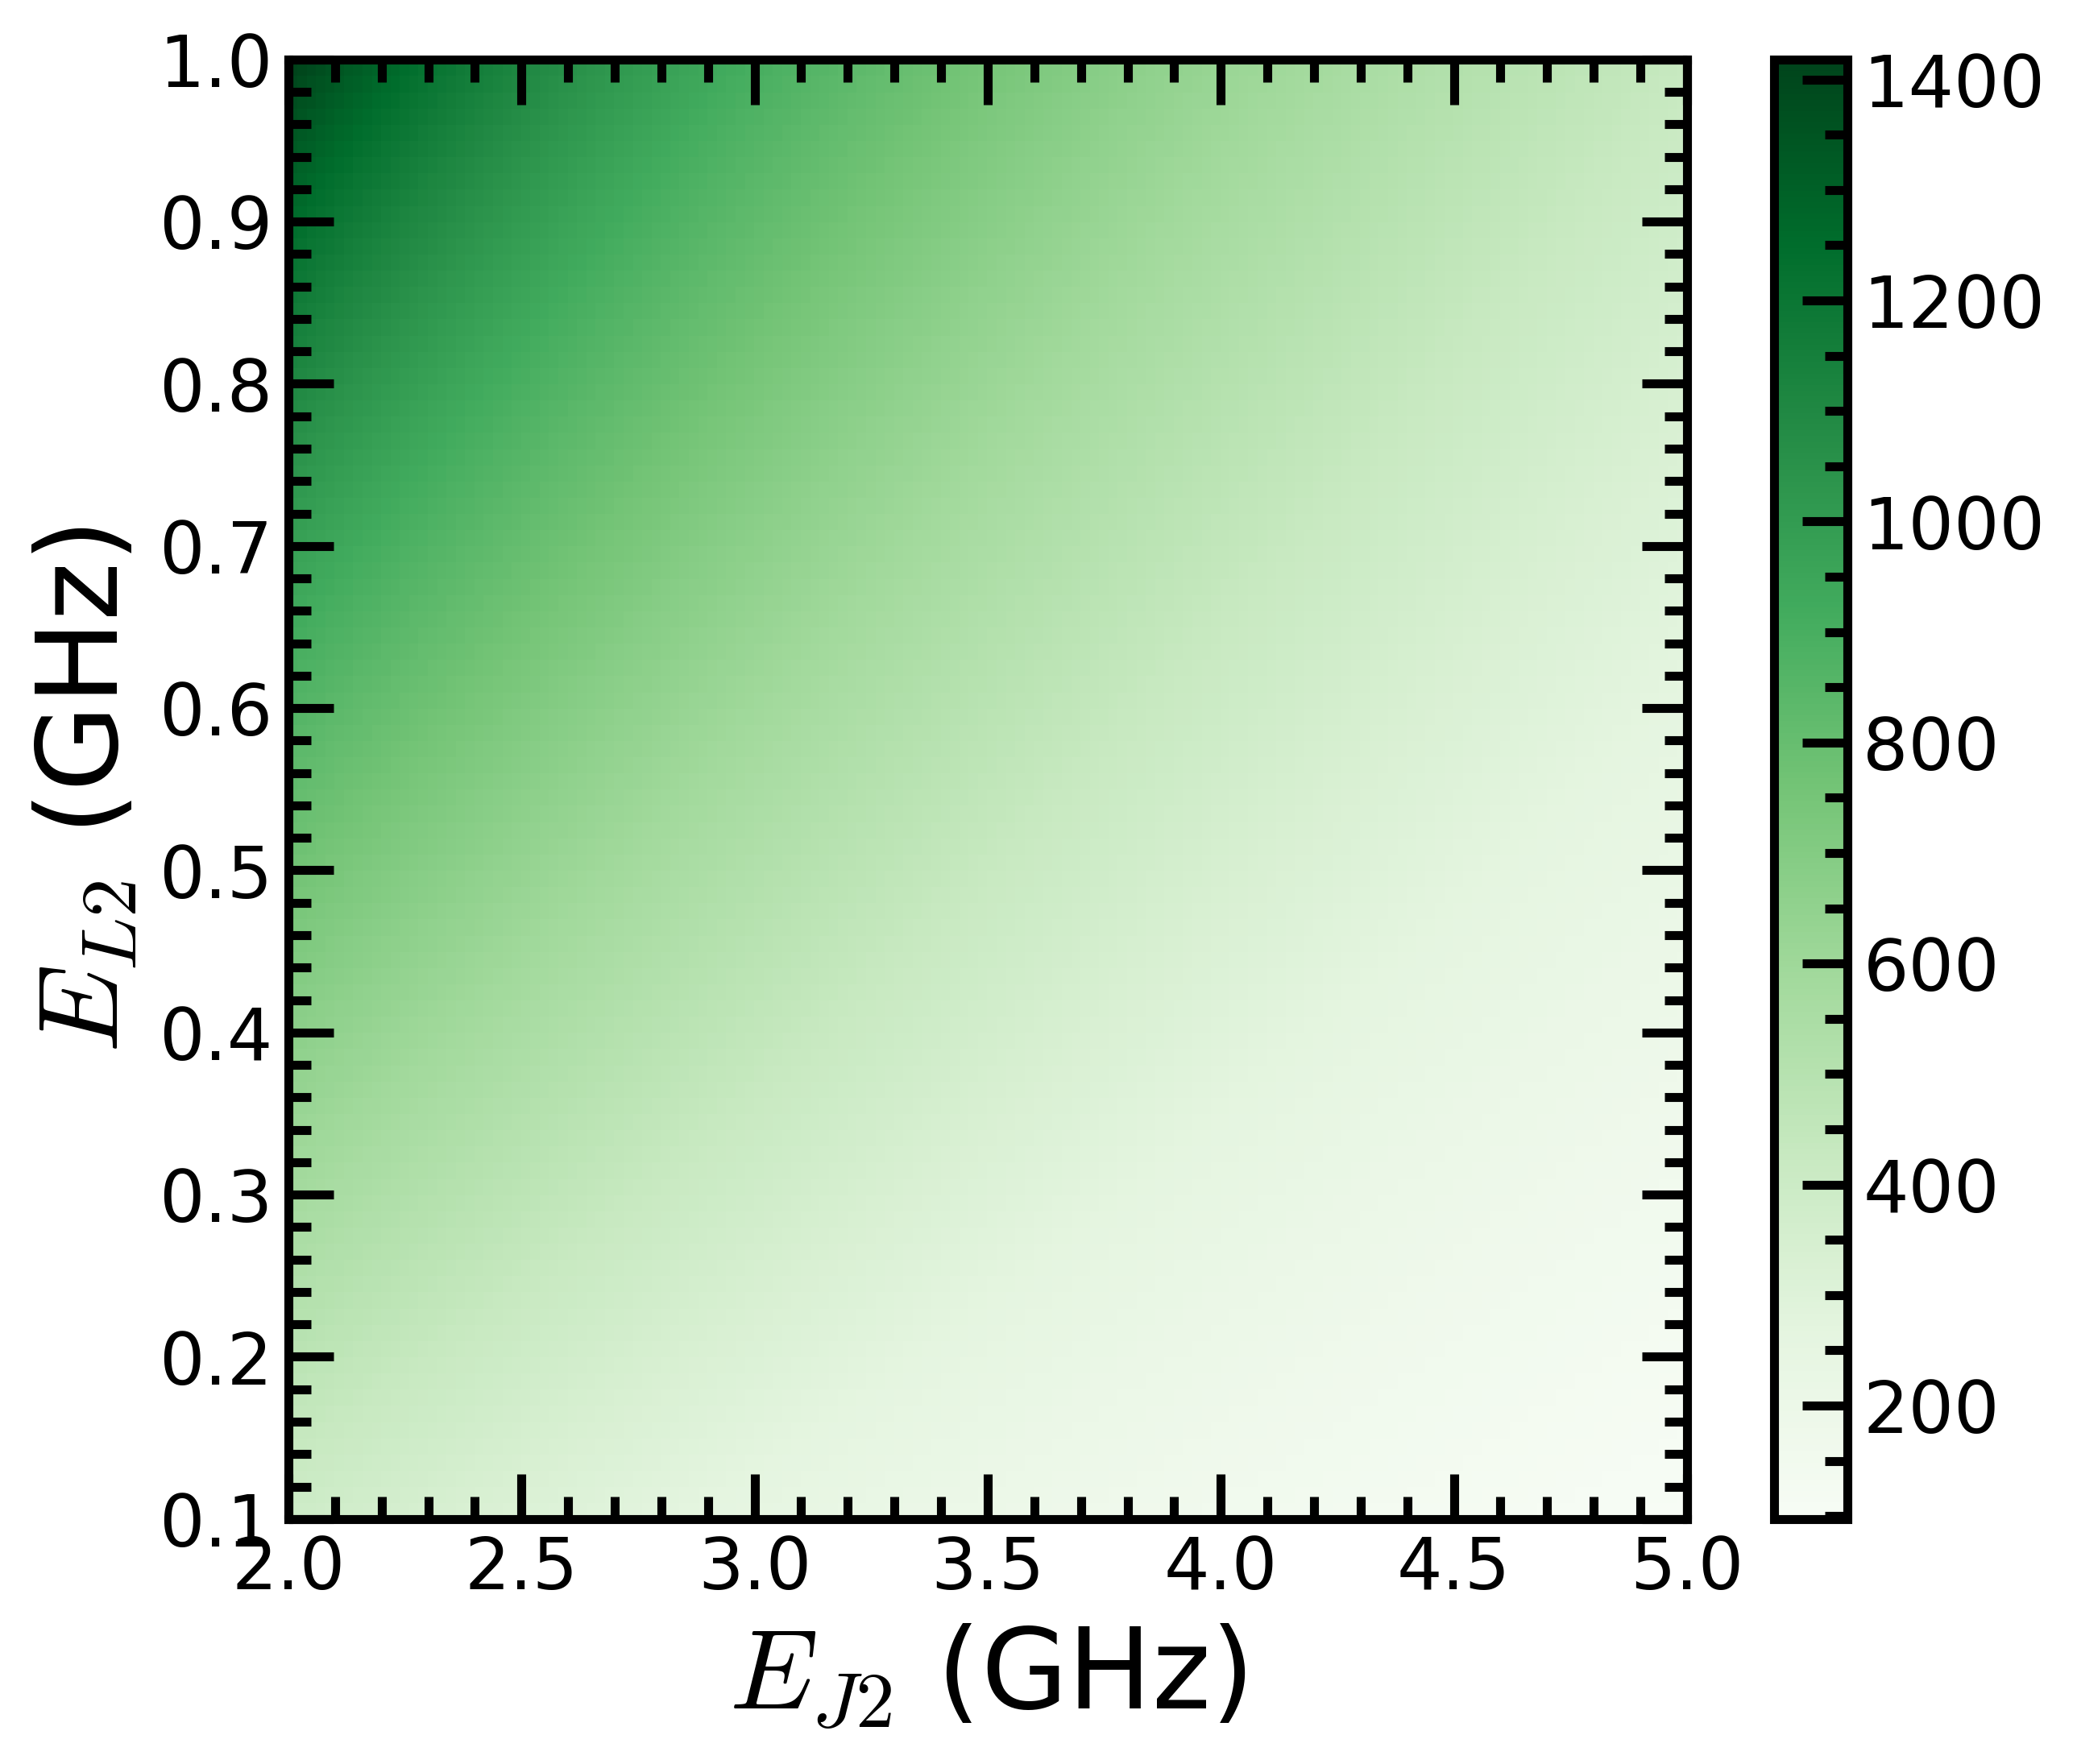

In [209]:
plt.figure(figsize = [7,6])
X,Y = np.meshgrid(EJ_array, EL_array)
Z = abs(ZZ_rate).transpose()*1e6
plt.pcolor(X,Y,Z, cmap = 'Greens')
plt.colorbar()
plt.xlabel(r'$E_{J2}$ (GHz)')
plt.ylabel(r'$E_{L2}$ (GHz)')

## Flux coupling
### Sweep flux

In [187]:
#Sweep flux with fixed coupling
coupling_type = 'flux'
E_int = 0.05 #GHz
nlev_show = 15  # The number of two-qubit levels to show.
energies_coupled_sflux = np.zeros((len(phi_pts),nlev_show))
for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_sflux[iphi, :] = system.levels()[:nlev_show]

Text(0, 0.5, 'Frequency (GHz)')

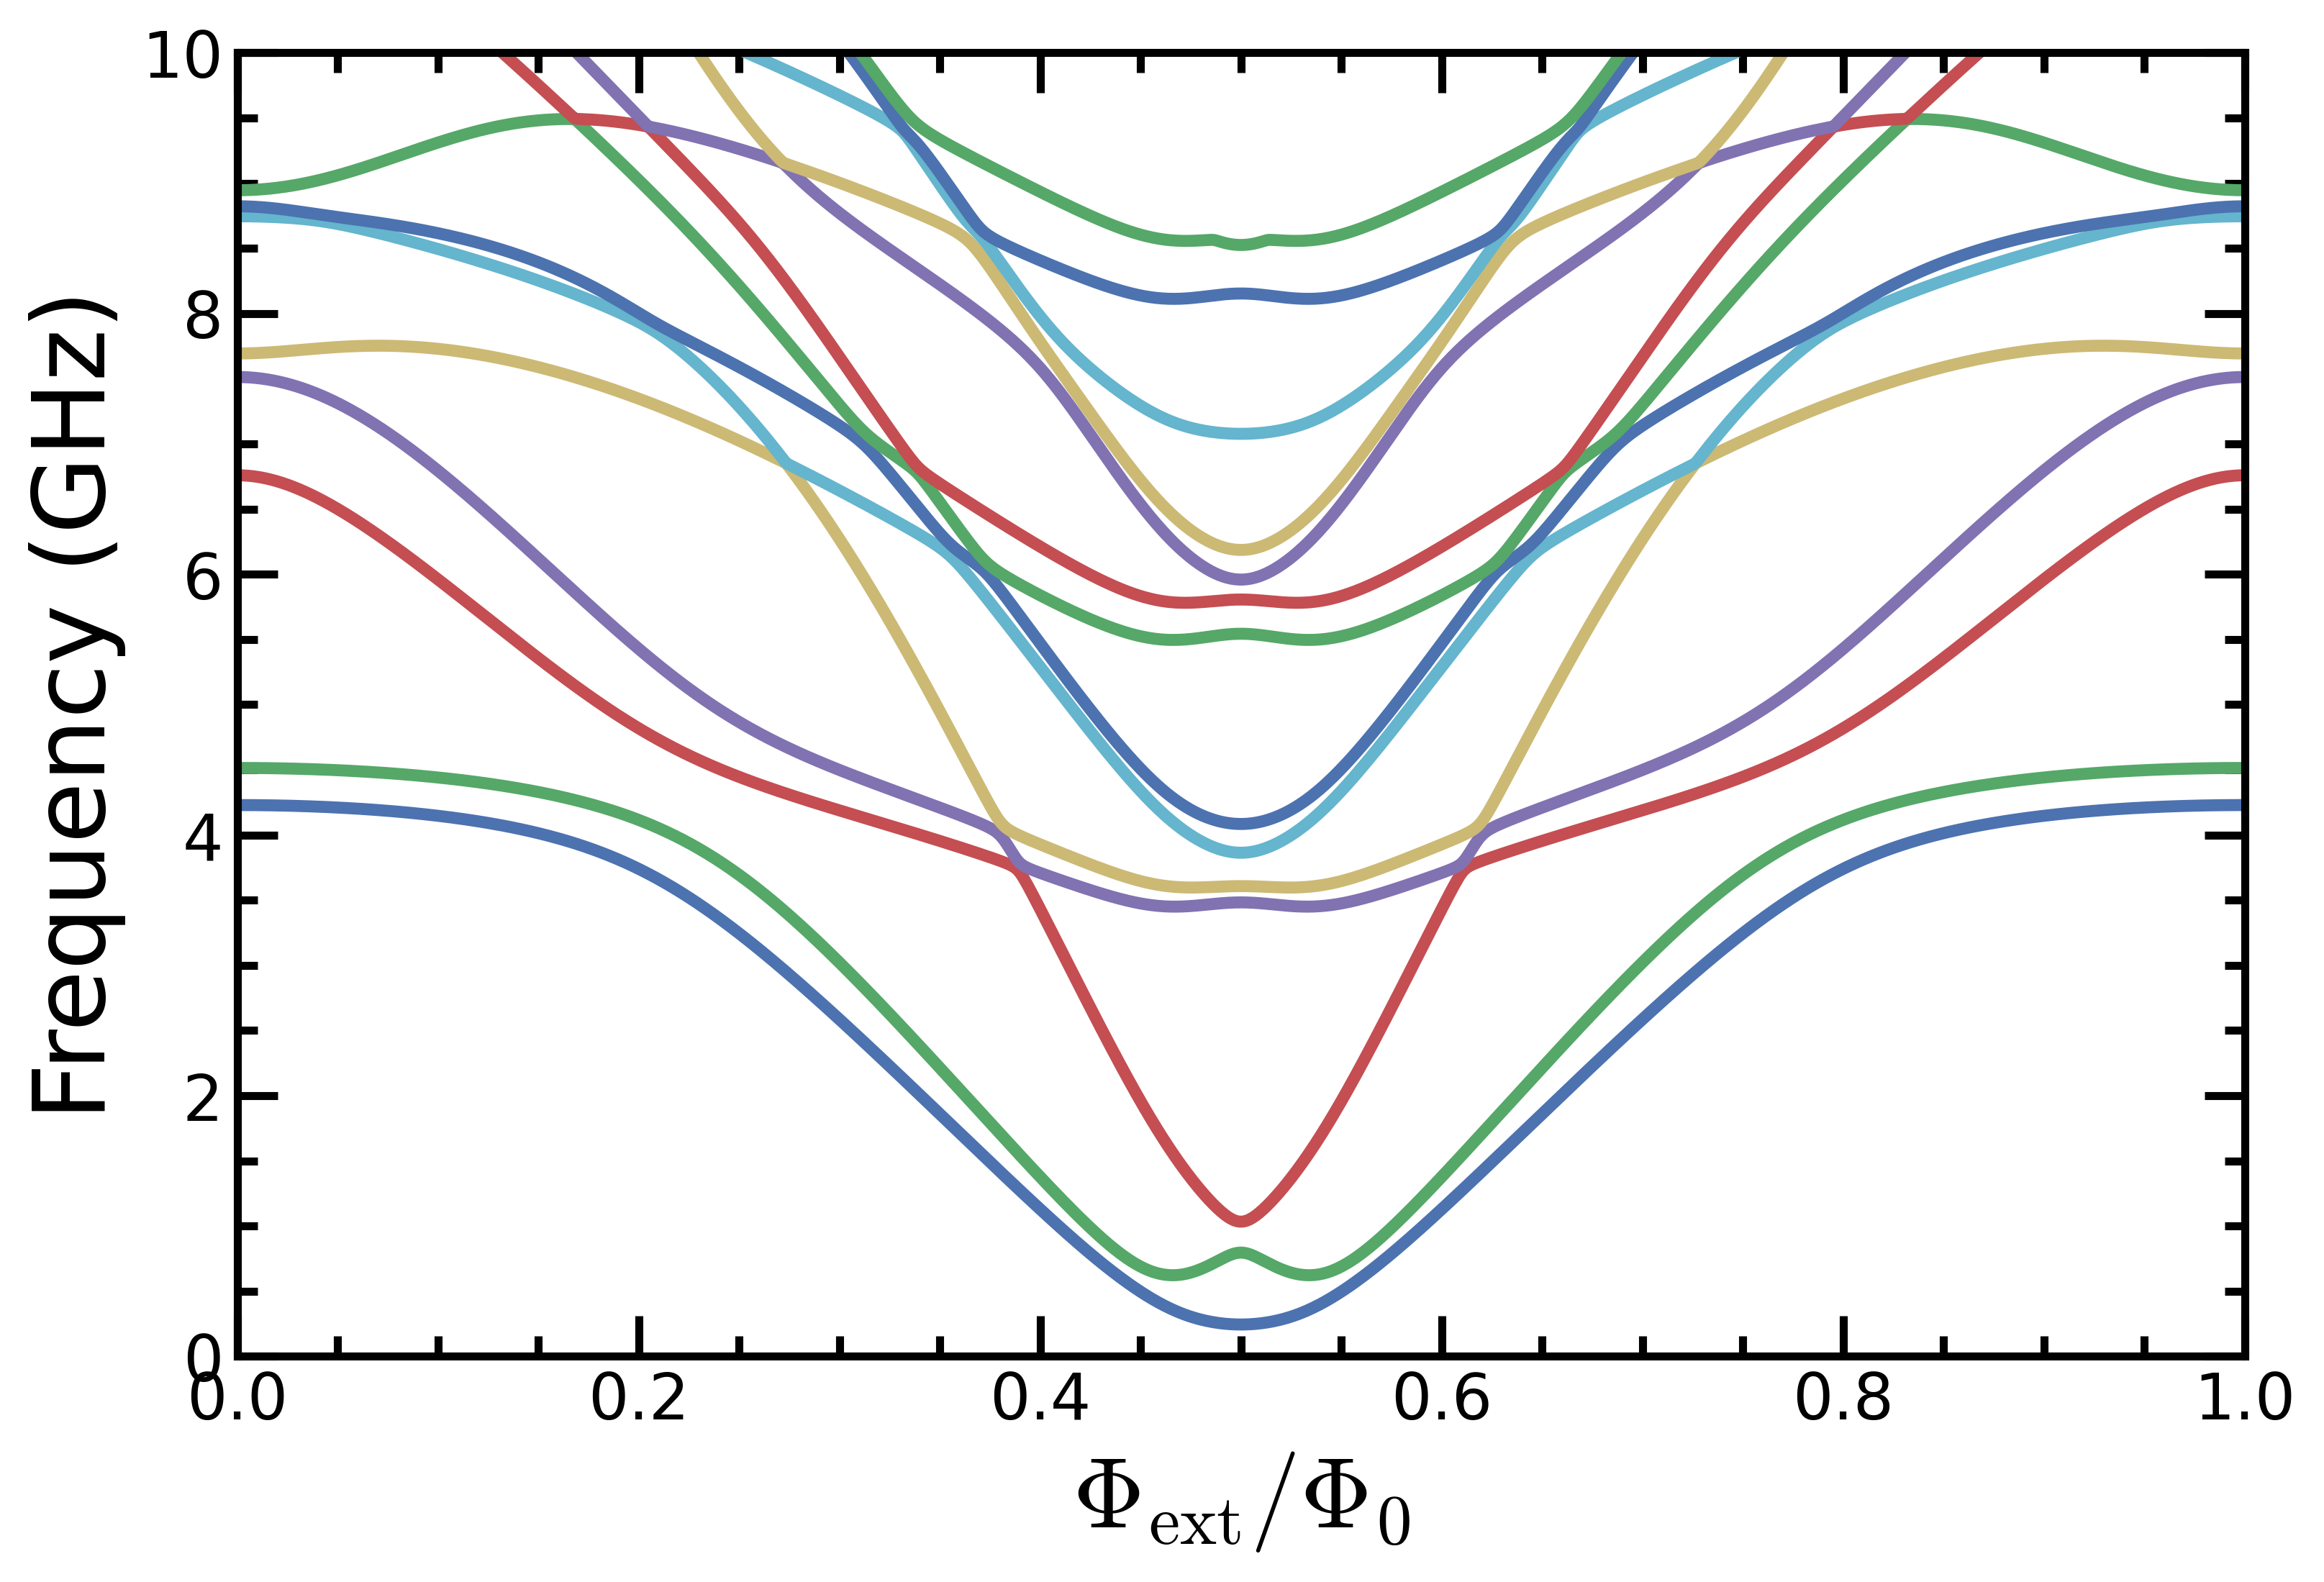

In [188]:
plt.figure(figsize = [9,6])
for idx in range(1, nlev_show):
    plt.plot(phi_pts/(np.pi*2), energies_coupled_sflux[:,idx] - energies_coupled_sflux[:,0])
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 10])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')

### Sweep coupling

In [189]:
#Sweep the coupling strength, charge
E_int_array = np.linspace(0, 0.01, 51)
phi_ext = np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(E_int_array)))

for idx, E_int in enumerate(E_int_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
    energies_coupled_swE[:,idx] = system.levels()

(0.0, 10.0)

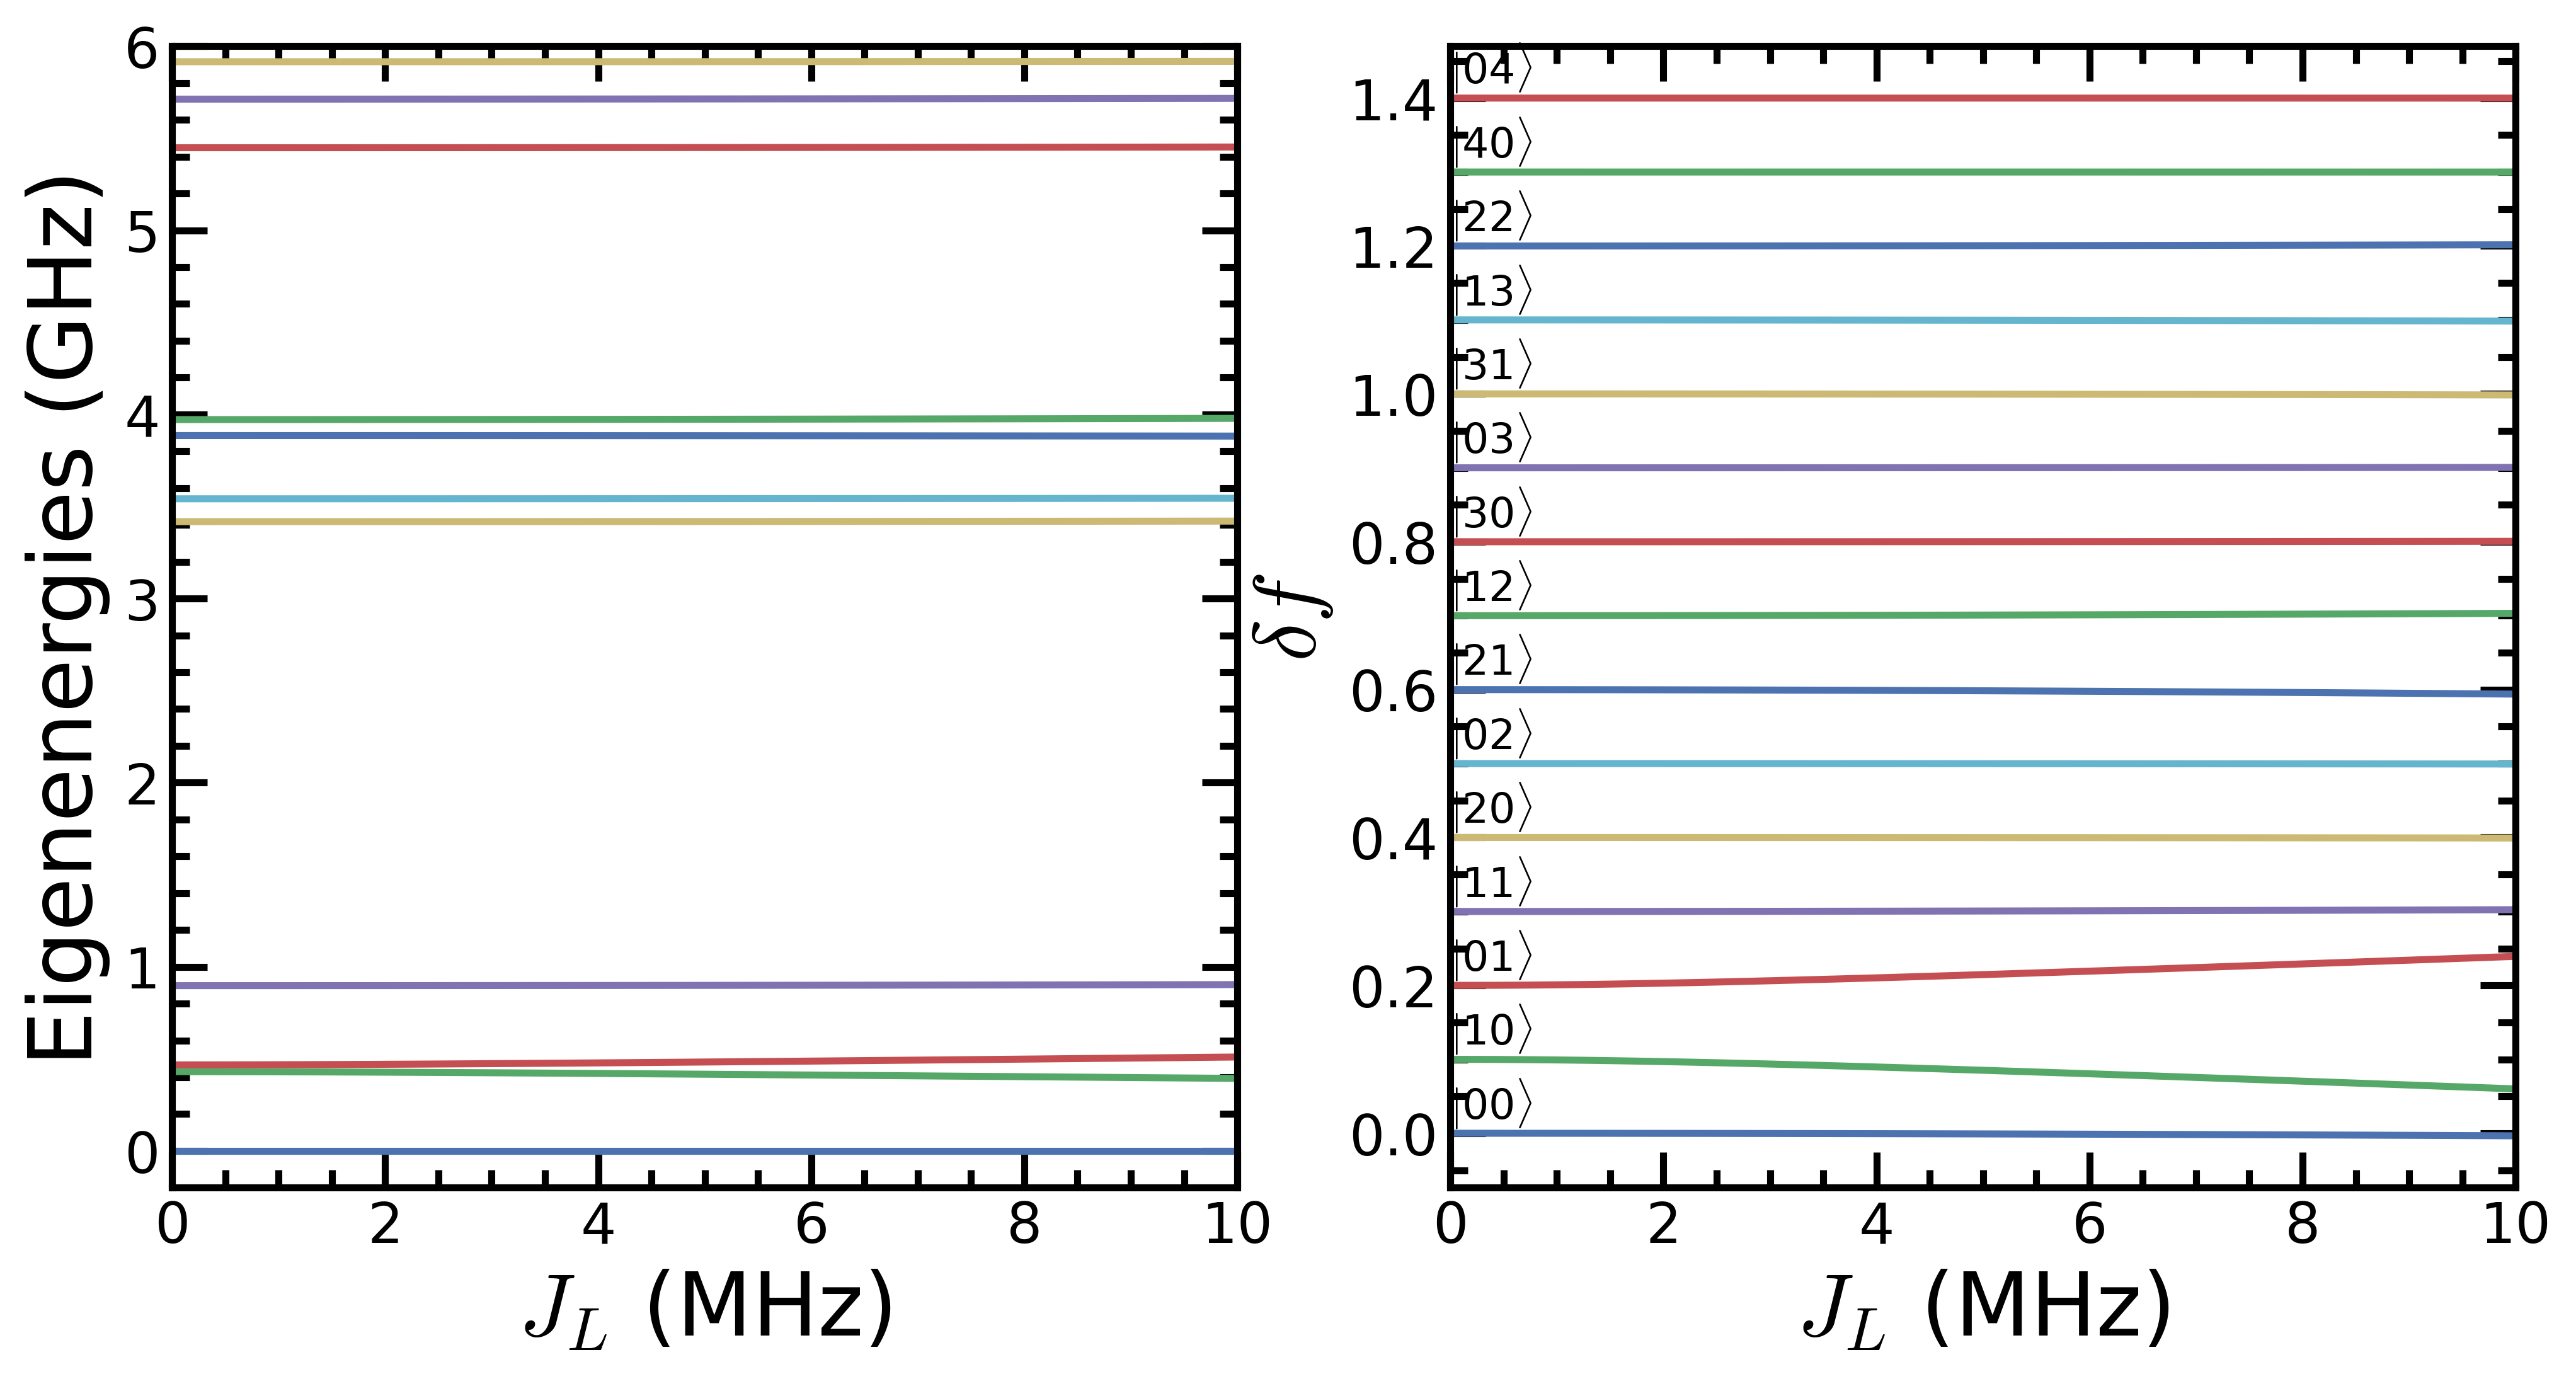

In [191]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,6])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

#Transition freqs
for idx in range(0, nlev_show):
    ax1.plot(E_int_array*1000, energies_coupled_swE[idx, :]-energies_coupled_swE[0, :], linewidth = 2.0)
ax1.set_xlabel('$J_L$ (MHz)')
ax1.set_ylabel('Eigenenergies (GHz)')
ax1.set_xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])
ax1.set_ylim([-0.2,6])

#State labeling
for idx in range(0, nlev_show):
    ax2.plot(E_int_array*1000, 0.1 * idx+(energies_coupled_swE[idx, :]-energies_coupled_swE[idx, 0]), linewidth = 2.0)
    label = (r'$|$' + system.level_label(idx, label_format='str') + r'$\rangle$')
    ax2.text(0, 0.02 + 0.1 * idx, label, fontsize=12)
ax2.set_xlabel('$J_L$ (MHz)')
ax2.set_ylabel(r'$\delta f$')
ax2.set_xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])

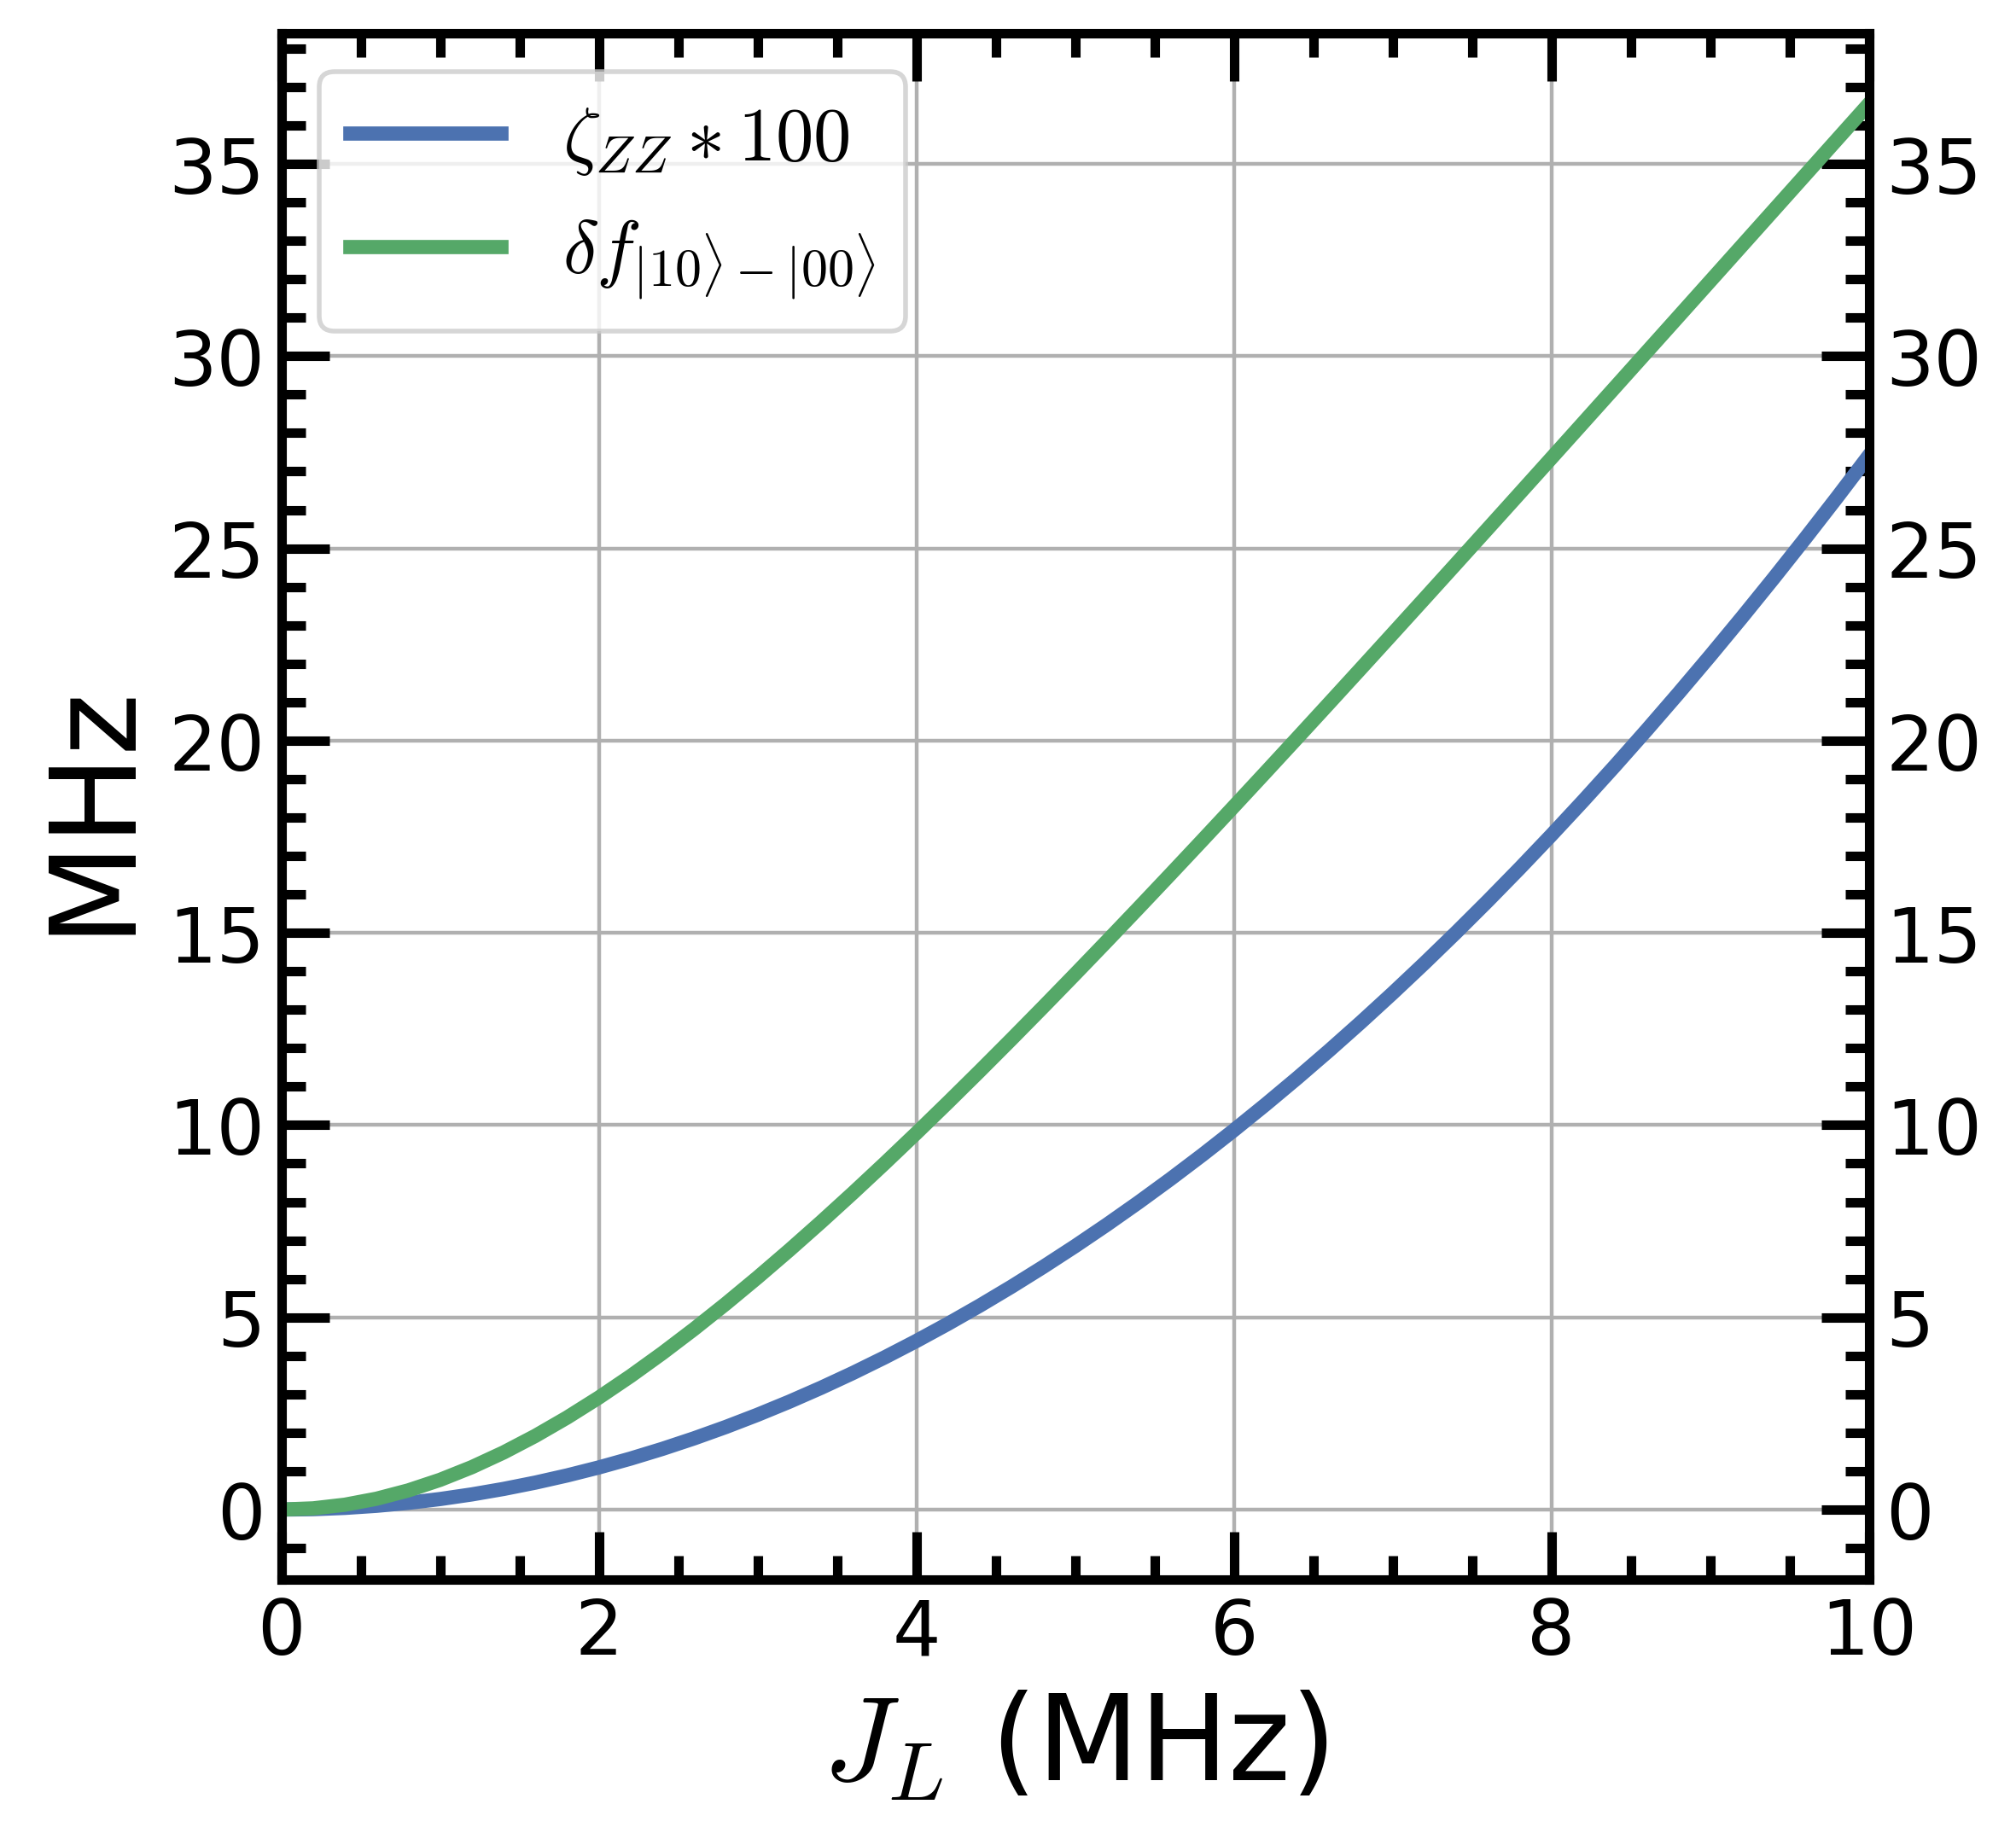

In [193]:
#Calculate ZZ rate:
plt.figure(figsize = [6,6])
zeta_ZZ = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift = energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :]
freq_shift = freq_shift - (energies_coupled_swE[system.level_label('10'), 0] - energies_coupled_swE[system.level_label('00'), 0])
plt.plot(E_int_array*1e3, abs(zeta_ZZ)*1e5, label = r'$\zeta_{ZZ}*100$')
plt.plot(E_int_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |00\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$J_L$ (MHz)')
plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])
plt.grid()

### Sweep parameters for ZZ rate

In [ ]:
#Sweep EJ and EL
coupling_type = 'flux'
E_int = 0.005
qubit1.phi_ext = np.pi
qubit2.phi_ext = np.pi
EJ_array = np.linspace(2,5,151)
EL_array = np.linspace(0.1,1,91)
ZZ_rate = np.zeros((len(EJ_array), len(EL_array)))
for EJ_idx, E_J2 in enumerate(EJ_array):
    for EL_idx, E_L2 in enumerate(EL_array): 
        qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
        qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
        system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, E_int, coupling_type])
        energies_ZZ_flux = system.levels()
        ZZ_rate[EJ_idx, EL_idx] = energies_ZZ_flux[system.level_label('11')] - energies_ZZ_flux[system.level_label('01')] \
- (energies_ZZ_flux[system.level_label('10')] - energies_ZZ_flux[system.level_label('00')])

In [ ]:
X,Y = np.meshgrid(EJ_array, EL_array)
Z = ZZ_rate*1e6
plt.pcolor(X,Y,Z, cmap = 'RdBu')